# Breve introdução

As olimpíadas é maior evento internacional de esporte do mundo! Reunindo de 4 em 4 anos os melhores atltetas de cada país dos esportes mais difundidos pelo globo! Você pode não conhecer os atletas, mas sempre tem o seu país (ou algum outro) para torcer. 

Falando em atletas, os medalhistas olimpícos recebem os holofotes e nos instigam a curiosidade. Quem ganhou mais vezes? Qual o país com mais medalhistas? É talento ou genética?

Nesse notebook procurei encontrar alguns padrões que podem responder algumas questões e também gerar outras.

# Análisando e visualizando dados da edições modernas dos jogos olímpicos


## Conhecendo os dados em linhas gerais

In [ ]:
# Importando as bibliotecas.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [ ]:
# Importando o dataset das olimpíadas.
df = pd.read_csv("olimpiadas.csv")

In [ ]:
# Checando as 10ªs linhas para ter a noção de como o dataset está estruturado.
df.head(10)  # .head() é um comando que mostra o nº de linhas desejadas.

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
8,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
9,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [ ]:
# Visualizar as informacoes o total de entradas e o DType das colunas.

df.info()  #.info() mostra informações sobre o df e suas colunas

# faltam valores em "Age", "Height", "Weight" e "Medal"
# "Weight" é object
# Mudar "Athlete_ID" para Dtype = object????

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


In [ ]:
# Verificando quais colunas tem valores nulos e a sua quantidade. Já dava para verificar se tinha nulos
#pelo .info(), mas dessa forma fica mais fácil.

df.isna().sum()  # .isna() verifica se cada célula de cada coluna é NaN, retornando True ou False. 
                 # .sum() vai somar o valor das células por coluna, sendo True = 1 e False = 0)

# Age, Height, Weight e Medal tem valores nulos, mas não é um problema.

Athlete_ID        0
Name              0
Sex               0
Age             973
Height        10020
Weight        10641
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal          5763
dtype: int64

In [ ]:
# Descrevendos algumas informações gerais dos dados númericos.

df.describe()  # .describe() retorna informações estatísticas gerais das colunas
               # que possuem valores numéricos. "std" é o desvio padrão e as % são os quartis.

# Altura máxima é de 1.9 milhões de metros, pode ter outros muito elevados.
# O ano mínimo é negativo, podem ter outros negativos .
# Tem uma criança de 10 anos??
# Os dados vão até o ano de 2016.

,Athlete_ID,Age,Height,Year
count,45567.000000,44594.000000,3.554700e+04,45567.000000
mean,69129.286282,25.851348,9.729939e+02,1972.391094
std,38866.485546,5.966053,3.446781e+04,94.200678
min,4.000000,10.000000,1.320000e+02,-2992.000000
25%,36105.500000,22.000000,1.700000e+02,1952.000000
50%,68634.000000,25.000000,1.780000e+02,1984.000000
75%,103181.000000,29.000000,1.850000e+02,2002.000000
max,135563.000000,73.000000,1.976779e+06,2016.000000


In [ ]:
# Descrevendo alguams informações gerais quanto aos dados númericos

df.describe(include = object)  # .describe() também pode descrever características gerais das
                               # colunas categóricas, quando se põe "include = object".

# 6 tipos de "Sex"?
# 4 tipos de "Medal"?
# 188 tipos de "Weight", enquanto objeto e não float (como seria com altura?).
# 5 Seasons?
# 602 times???
# 201 comitês olímpicos nacionais de 206 conhecidos, sendo o mais novo a ingressar em 2015.

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


A partir dessas informações iniciais sobre o dataset, vemos que precisamos verificar mais profundamente e também realizar uma limpeza dos dados.

## **Limpando** os dados

### Valores categóricos

#### NOC

In [ ]:
# Checando as categorias únicas de "Weight" para ver se alguma está errada.

df.NOC.unique()  # df.NOC ou df["NOC"] seleciona a coluna do df e .unique() 
                 # retorna os valores únicos, incluindo valores categóricos,
                 # numéricos e NaN's e especificando o data type da coluna.

# Aparentemente nada de errado

array(['DEN', 'USA', 'FIN', 'NOR', 'NED', 'FRA', 'ITA', 'ESP', 'AZE',
       'RUS', 'ARG', 'BLR', 'CMR', 'HUN', 'GRE', 'AUS', 'EGY', 'IRI',
       'CAN', 'PAK', 'URS', 'UZB', 'TJK', 'EUN', 'JPN', 'ETH', 'SUI',
       'GDR', 'GER', 'MON', 'SWE', 'RSA', 'TUR', 'BUL', 'GBR', 'POL',
       'DJI', 'JOR', 'ROU', 'CUB', 'PUR', 'VEN', 'MEX', 'GHA', 'MAR',
       'NZL', 'URU', 'TCH', 'NGR', 'KEN', 'BRA', 'AUT', 'LTU', 'BEL',
       'FRG', 'BEN', 'PAN', 'ESA', 'INA', 'MAS', 'KOR', 'CHI', 'MTN',
       'UKR', 'SCG', 'UGA', 'IRQ', 'SYR', 'QAT', 'KUW', 'OMA', 'PLE',
       'IOA', 'KSA', 'UAE', 'CRO', 'COL', 'ARM', 'SRB', 'ISL', 'NIG',
       'ISV', 'PNG', 'SUD', 'IND', 'BIH', 'ALG', 'JAM', 'TTO', 'CIV',
       'PHI', 'LUX', 'POR', 'BOT', 'ROT', 'TUN', 'PRK', 'CHN', 'YUG',
       'MAD', 'GUY', 'KAZ', 'ISR', 'IRL', 'IVB', 'DOM', 'GEO', 'EST',
       'HAI', 'CZE', 'AFG', 'SVK', 'SAA', 'PAR', 'BAH', 'ANZ', 'MNE',
       'GUA', 'AND', 'ANG', 'SLO', 'TAN', 'BER', 'LIB', 'MRI', 'ALB',
       'KGZ', 'BAR',

In [ ]:
# Checando os NOCs com uma contagem baixa, pois um mesmo erro aleatório só costuma ocorrer uma vez.
# Escolhi 3, pois 4 para mais já corta a visualização da lista. No caso de um número grande de categorias
# únicas e de um mesmo erro que ocorre várias vezes, eu não sei como encontrar além de checar um por um,
# o que eu não fiz.

NOC_value = df.NOC.value_counts()  # e .value_counts() o nº de vezes que os valores únicos aparecem e retorna uma série.
NOC_3 = NOC_value[NOC_value <= 3 ] # uma condição no dataframe retorna True e False's para cada célula, ai precisa inserir
                                   # esses boolens no df de novo para selecionar as linhas que tem as células com True.
NOC_3

# Não me parece ter nenhuma NOC estranho.

SAM    3
TGA    3
SUR    3
LES    3
COD    3
MYA    3
BUR    3
MLT    3
BRN    3
NIG    3
ALB    3
BDI    3
SAA    3
CAY    3
ARU    2
LBA    2
JOR    2
LBR    2
ERI    2
MAL    2
GRN    2
BAR    2
MTN    2
IVB    2
COK    2
MKD    2
SWZ    1
KOS    1
PLE    1
AHO    1
GUI    1
ANT    1
ROT    1
CAM    1
CGO    1
NRU    1
MHL    1
NEP    1
SLE    1
RHO    1
VIN    1
BIZ    1
RWA    1
DMA    1
YAR    1
YEM    1
SOL    1
SKN    1
FSM    1
MAW    1
GAM    1
CRT    1
KIR    1
TOG    1
Name: NOC, dtype: int64

#### Games

In [ ]:
# Checando para ver se tem alguma categoria estranha/errada,
# tanto pelo nome quanto pela sua contagem que seria de 1 (a menos que fosse sistemático).

df.Games.value_counts(ascending = True)  # O parâmetro ascending define se vai mostrar os valores
                                         # em ordem crescente ou decrescente.
# Não me parece ter nada de errado.

1932 Winter      93
1928 Winter      99
1936 Winter     133
1924 Winter     134
1896 Summer     149
1948 Winter     157
1952 Winter     162
1956 Winter     168
1960 Winter     170
1972 Winter     232
1964 Winter     242
1968 Winter     244
1976 Winter     255
1980 Winter     258
1984 Winter     287
1988 Winter     329
1992 Winter     404
1994 Winter     413
1906 Summer     493
1904 Summer     518
1998 Winter     522
2002 Winter     566
2010 Winter     627
2006 Winter     627
1900 Summer     632
1932 Summer     702
2014 Winter     713
1928 Summer     852
1908 Summer     900
1924 Summer     958
1948 Summer     969
1956 Summer    1007
1912 Summer    1026
1936 Summer    1037
1952 Summer    1075
1960 Summer    1076
1964 Summer    1203
1968 Summer    1246
1920 Summer    1376
1972 Summer    1411
1980 Summer    1525
1976 Summer    1527
1984 Summer    1680
1988 Summer    1844
1992 Summer    1990
1996 Summer    2135
2012 Summer    2233
2004 Summer    2257
2000 Summer    2279
2016 Summer    2311


#### Sport

In [ ]:
# Checando para ver se tem alguma categoria estranha/errada,
# tanto pelo nome quanto pela sua contagem que seria de 1 (a menos que fosse sistemático).

df.Sport.value_counts(ascending = True)
# Esse 5 primeiros esportes de fato existiram.

Aeronautics         1
Basque Pelota       2
Jeu De Paume        3
Roque               3
Motorboating        8
                 ... 
Fencing          1961
Gymnastics       2871
Rowing           3137
Swimming         3552
Athletics        4811
Name: Sport, Length: 66, dtype: int64

In [ ]:
# Checando todos os nomes, já que não apareceu todos antes.

df.Sport.unique()
# Skeleton e Racquets são também esportes que existiram.
# Aparentemente não encontrei nada de errado.

array(['Tug-Of-War', 'Cross Country Skiing', 'Swimming', 'Ice Hockey',
       'Gymnastics', 'Alpine Skiing', 'Handball', 'Hockey', 'Rowing',
       'Football', 'Speed Skating', 'Sailing', 'Cycling', 'Fencing',
       'Taekwondo', 'Athletics', 'Canoeing', 'Water Polo', 'Wrestling',
       'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball',
       'Volleyball', 'Boxing', 'Basketball', 'Nordic Combined',
       'Baseball', 'Diving', 'Shooting', 'Freestyle Skiing', 'Bobsleigh',
       'Equestrianism', 'Curling', 'Judo', 'Tennis', 'Badminton',
       'Rugby Sevens', 'Rhythmic Gymnastics', 'Weightlifting',
       'Beach Volleyball', 'Ski Jumping', 'Rugby',
       'Short Track Speed Skating', 'Archery', 'Biathlon', 'Lacrosse',
       'Synchronized Swimming', 'Triathlon', 'Polo', 'Luge',
       'Table Tennis', 'Art Competitions', 'Snowboarding', 'Cricket',
       'Skeleton', 'Racquets', 'Military Ski Patrol', 'Croquet', 'Roque',
       'Alpinism', 'Trampolining', 'Basque Pelota', 'Motor

####City

In [ ]:
# Checando os nomes e a contagem para ver para encontrar um erro.

df.City.value_counts(ascending = True)
#Claramente nota-se o ######.

Garmisch-Partenkirchen     133
######                     134
Chamonix                   134
Oslo                       161
Cortina d'Ampezzo          168
Squaw Valley               170
Sapporo                    232
Grenoble                   242
Sankt Moritz               256
Sarajevo                   285
Calgary                    329
Lake Placid                351
Albertville                403
Lillehammer                412
Innsbruck                  497
St. Louis                  518
Nagano                     521
Salt Lake City             563
Vancouver                  622
Torino                     624
Sochi                      709
Amsterdam                  849
Melbourne                  963
Berlin                    1036
Stockholm                 1070
Helsinki                  1074
Roma                      1076
Tokyo                     1198
Mexico City               1242
Antwerpen                 1376
Munich                    1407
Moskva                    1521
Montreal

In [ ]:
# Eu poderia só dropar as linhas com hashtag, mas decidi substituí-las pela cidade
# real utilizada, mesmo que fosse irrelevante. Então, eu primeiro crio um dataframe 
#só com linhas que tem a "City" como "######".

jogos_da_velha = df[df["City"] == "######"]
jogos_da_velha

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1565,5815,"Gillian ""Jill"" Atkins",F,29.0,165.0,65.0,Great Britain,GBR,1992 Summer,1992,Summer,######,Hockey,Hockey Women's Hockey,Bronze
2158,7903,Jane Louise Barkman (-Brown),F,17.0,169.0,61.0,United States,USA,1968 Summer,1968,Summer,######,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
3016,10360,Liubov Ivanivna Berezhna-Odynokova,F,20.0,167.0,61.0,Soviet Union,URS,1976 Summer,1976,Summer,######,Handball,Handball Women's Handball,Gold
3211,10955,Annemieke Marileen Bes,F,30.0,177.0,70.0,Netherlands,NED,2008 Summer,2008,Summer,######,Sailing,Sailing Women's Three Person Keelboat,Silver
3435,11671,"Suzanne Brigit ""Sue"" Bird",F,35.0,175.0,66.0,United States,USA,2016 Summer,2016,Summer,######,Basketball,Basketball Women's Basketball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44090,131311,Jenny Wolf (-Lotze),F,31.0,172.0,75.0,Germany,GER,2010 Winter,2010,Winter,######,Speed Skating,Speed Skating Women's 500 metres,Silver
44217,131657,Katarzyna Bronisawa Woniak,F,20.0,173.0,61.0,Poland,POL,2010 Winter,2010,Winter,######,Speed Skating,Speed Skating Women's Team Pursuit (6 laps),Bronze
44378,132068,Xu Jing,F,21.0,169.0,hsuahusahu,China,CHN,2012 Summer,2012,Summer,######,Archery,Archery Women's Team,Silver
44804,133368,Yu Song,F,29.0,182.0,128.0,China,CHN,2016 Summer,2016,Summer,######,Judo,Judo Women's Heavyweight,Bronze


In [ ]:
#Substituindo os ###### pela cidade utilizada no mesmo ano e temporada ("Games") e evento ("Event) (pois 
# talvez tivesse algum evento que fosse realizado em outra cidade) com base na moda do valor de cidades 
# (moda para evitar erros e outros #) para um dado jogo.
#Para tal, fiz um código que cria um df "grupo_games" com o dataset do df original para cada linha do "jogos_da_velha"
# cujas colunas "Games" e "Event" são filtradas pelo valor das células referentes a essas colunas da linha atual da iteração.
# Depois, substitui, no df original, o ###### da linha atual da iteração pela moda dos valores de "City" em "grupo_games".

for lab, row in jogos_da_velha.iterrows() :           # Essa função vai percorrer o "label" (nome) do índice de cada linha do df escolhido.

 #.loc() retorna o valor de uma célula específica, sendo o 1º valor o nome do índice da linha atualmente iterada e o 2º valor é o nome 
 # de uma coluna. Assim, a célula é especificada pelo cruzamento entre a linha identificada pelo índice com a coluna de interesse.

  temporada_ano = df["Games"] == df.loc[lab, "Games"] # "temporada_ano" vai receber os boolens da condição em que as células da coluna "Games"
                                                      # é igual a célula de "Games" da linha atual da iteração.
  evento = df["Event"] == df.loc[lab, "Event"]        # "evento" segue a mesma lógica só que com "Event".

  grupo_games = df[(temporada_ano) & (evento)]        # "grupo_games" receberá as linhas do df original que respeitam as condições referentes às
                                                      # colunas de "Games" e "Event". O operador "&" faz uma comparação bit a bit, enquanto o "and"
                                                      # é uma operação lógica, mas funciona "igual" ao "and", no sentido de cumprir uma condição E outra
  df.loc[lab, "City"] = grupo_games["City"].mode()[0] # Momento que substitui o ###### pelo valor real da cidade.

####Weight:

In [ ]:
# Checando as categorias do valor de peso para achar algum que não poderia ser convertido
# para um valor numérico

print(df.Weight.unique())

# Temos o "hsuahusahu"

[nan '75.0' '85.0' '64.0' '72.0' '90.0' '87.0' '49.0' 'hsuahusahu' '76.0'
 '83.0' '86.0' '82.0' '55.0' '67.0' '60.0' '79.0' '96.0' '97.0' '70.0'
 '88.0' '56.0' '80.0' '59.0' '91.0' '62.0' '63.0' '130.0' '104.0' '73.0'
 '84.0' '125.0' '50.0' '102.0' '48.0' '58.0' '78.0' '40.0' '68.0' '92.0'
 '61.0' '95.0' '89.0' '65.0' '93.0' '77.0' '46.0' '81.0' '52.0' '54.0'
 '57.0' '69.0' '99.0' '69.5' '51.0' '120.0' '74.0' '110.0' '100.0' '66.0'
 '47.0' '116.0' '107.0' '53.0' '45.0' '105.0' '109.0' '156.0' '71.0'
 '98.0' '160.0' '106.0' '146.0' '44.0' '138.0' '141.0' '94.0' '118.0'
 '101.0' '39.0' '32.0' '112.0' '115.0' '74.5' '121.0' '135.0' '111.0'
 '43.0' '36.0' '67.5' '114.0' '132.0' '65.5' '42.0' '59.5' '127.5' '108.0'
 '35.0' '117.0' '103.0' '58.5' '214.0' '113.0' '146.5' '116.5' '140.0'
 '38.0' '101.5' '154.0' '57.5' '136.0' '127.0' '102.5' '170.0' '126.0'
 '77.3333333333333' '122.0' '55.5' '41.0' '123.0' '34.0' '150.0' '109.5'
 '37.0' '70.5' '71.5' '30.0' '76.5' '64.5' '33.0' '129.0' '137.0'

In [ ]:
# Checando quantos "hsuahusahu" são:

sla = df[df["Weight"] == "hsuahusahu"]
sla.info()
# Optei por torná-los NaN's ao invés de dropar suas linhas, pois perderíamos as informações
# das outras células. Também decidi por não substituir pela moda, média ou mediana, pois 
# enviesaria uma análise numérica de "weight" com dados irreais.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 31 to 45547
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  500 non-null    int64  
 1   Name        500 non-null    object 
 2   Sex         500 non-null    object 
 3   Age         499 non-null    float64
 4   Height      466 non-null    float64
 5   Weight      500 non-null    object 
 6   Team        500 non-null    object 
 7   NOC         500 non-null    object 
 8   Games       500 non-null    object 
 9   Year        500 non-null    int64  
 10  Season      500 non-null    object 
 11  City        500 non-null    object 
 12  Sport       500 non-null    object 
 13  Event       500 non-null    object 
 14  Medal       431 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 62.5+ KB


In [ ]:
# Convertendo a coluna toda para float64 e os valores que não são possíveis ("errors")
# são coagidos ("coerce") a NaNs, como o "hsuahusahu".

df["Weight"] = pd.to_numeric(df["Weight"], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34426 non-null  float64
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.2+ MB


In [ ]:
# Agora é possível uma análise numérica de "Weight".

df.describe()
# Não percebi nada que aparenta estar errado.

,Athlete_ID,Age,Height,Weight,Year
count,45567.000000,44594.000000,3.554700e+04,34426.000000,45567.000000
mean,69129.286282,25.851348,9.729939e+02,73.482450,1972.391094
std,38866.485546,5.966053,3.446781e+04,14.977912,94.200678
min,4.000000,10.000000,1.320000e+02,28.000000,-2992.000000
25%,36105.500000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68634.000000,25.000000,1.780000e+02,72.000000,1984.000000
75%,103181.000000,29.000000,1.850000e+02,82.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


####Medals:

In [ ]:
# Checando quais são os 4 tipos de medalhas e suas contagens.
df.Medal.value_counts()

Gold      13320
Bronze    13255
Silver    13063
Nelson      166
Name: Medal, dtype: int64

In [ ]:
# Como não sei e nem consigo supor quais seriam os valores reais para Nelson e também são só 166 linhas,
# optei por remover, pois acredito que não afetará muito a visualização dos dados.

Só_Nelson = df[df['Medal'] == 'Nelson'].index    # .index retorna a coluna de índice do dataframe
df.drop(Só_Nelson , inplace=True)                 #. drop() retira as linhas do df que cumprem determinada condição.
                                                  # No caso, as linhas cujas "Medals" são iguais a "Nelson" e o
                                                  # inplace determina se essa mudança vai substituir o dataset do df
                                                  # que antecede o "." de ".drop()".

####Sex:

In [ ]:
# Checando quais são os 6 tipos de sexo e suas contagens.
df.Sex.value_counts()

M                          31664
F                          11562
MALE                         765
FEMALE                       765
P&D >> Comunidade            333
Vic vai te dar um socao      312
Name: Sex, dtype: int64

In [ ]:
# "MALE" e "FEMALE" basta substituir por "M" e "F".

df['Sex'].replace('MALE', 'M', inplace = True)     # .replace() substitui o 1º valor dado pelo 2º, no caso "MALE" por "M".
df['Sex'].replace('FEMALE', 'F', inplace = True)   # Agora, "FEMALE" por "F".

#Conferindo se deu certo.
print(df.Sex.unique())

['M' 'F' 'Vic vai te dar um socao' 'P&D >> Comunidade']


In [ ]:
# Agora para "P&D >> Comunidade" e "Vic vai te dar um socao", eu decidi substituir pelo valor original,
# seguindo a mesma lógica que eu utilizei para os ###### em "City".
# Primeiro criei um df com esses valores errados de Sex.

Binarismo = df[df["Sex"].isin(["P&D >> Comunidade", "Vic vai te dar um socao"])]  # .isin() retorna booleans 
           # para células da coluna determinada antes do ".", "Sex", caso apresentem o valores ou uma lista
           # de valores definidos, no caso a lista ["P&D >> Comunidade", "Vic vai te dar um socao"]. 
Binarismo

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
21,30,Pepijn Aardewijn,Vic vai te dar um socao,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
131,562,Pawe Abratkiewicz,Vic vai te dar um socao,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,NaN
227,963,Derrick Ralph Adkins,Vic vai te dar um socao,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold
355,1435,Janne Petteri Ahonen,Vic vai te dar um socao,28.0,184.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
365,1467,Mara Magdalena Aicega Amicarelli,P&D >> Comunidade,34.0,165.0,60.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44982,133933,Javier Adelmar Zanetti,Vic vai te dar um socao,22.0,178.0,73.0,Argentina,ARG,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Silver
45021,134077,Nataliya Borisovna Zasulskaya,P&D >> Comunidade,23.0,190.0,95.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
45103,134294,Martina Zellner (-Seidl),P&D >> Comunidade,23.0,169.0,62.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Gold
45187,134531,Zhang Ping,P&D >> Comunidade,22.0,187.0,73.0,China,CHN,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Women's Volleyball,Gold


In [ ]:
# Depois fiz a iteração tal qual fiz para os ### em "City".

for lab, row in Binarismo.iterrows() :
  grupo_games = df[df["Event"] == df.loc[lab, "Event"]]

  df.loc[lab, "Sex"] = grupo_games["Sex"].mode()[0]

####Seasons:

In [ ]:
# Checando quais são os 5 tipos de temporada e suas contagens.
df.Season.value_counts()

Summer            38469
Winter             6781
#ForaBolsonaro       71
Ele não              50
Ele nunca            30
Name: Season, dtype: int64

In [ ]:
# Criando um df só com as seasons que não são "Winter" e "Summer".

Win_Sum = df["Season"].isin(["Summer", "Winter"])
Not_Win_Sum = df[~Win_Sum]                         # "~" inverte os valores dos booleans, True para False e vice-versa.
Not_Win_Sum

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1141,4359,va Angyal,F,21.0,163.0,63.0,#ForaBolsonaro,HUN,1976 Summer,1976,#ForaBolsonaro,Montreal,Handball,Handball Women's Handball,Bronze
1701,6299,Yelena Yuryevna Azarova,F,31.0,165.0,64.0,#ForaBolsonaro,RUS,2004 Summer,2004,#ForaBolsonaro,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
2371,8590,Suzy Batkovic (-Brown),F,23.0,195.0,89.0,Australia,AUS,2004 Summer,2004,Ele nunca,Athina,Basketball,Basketball Women's Basketball,Silver
2568,9111,Anna Rose Bebington-Watkins,F,25.0,183.0,78.0,Great Britain,GBR,2008 Summer,2008,Ele não,Beijing,Rowing,Rowing Women's Double Sculls,Bronze
2626,9250,Gudrun Beckmann,F,17.0,174.0,62.0,#ForaBolsonaro,FRG,1972 Summer,1972,#ForaBolsonaro,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43891,130759,"Helen Newington Wills (-Moody, -Roark)",F,18.0,NaN,NaN,#ForaBolsonaro,USA,1924 Summer,1924,#ForaBolsonaro,Paris,Tennis,Tennis Women's Singles,Gold
44531,132574,Yang Yun,F,15.0,158.0,40.0,#ForaBolsonaro,CHN,2000 Summer,2000,#ForaBolsonaro,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
44952,133869,Yelena Mikhaylovna Zamolodchikova,F,17.0,154.0,43.0,Russia,RUS,2000 Summer,2000,Ele não,Sydney,Gymnastics,Gymnastics Women's Floor Exercise,Gold
45102,134290,Heidi Zeller-Bhler,F,24.0,158.0,65.0,Switzerland,SUI,1992 Winter,1992,Ele nunca,Albertville,Alpine Skiing,Alpine Skiing Women's Super G,NaN


In [ ]:
# Depois fiz a iteração tal qual fiz para os ### em "City".

for lab, row in Not_Win_Sum.iterrows() :
  grupo_games = df[df["Games"] == df.loc[lab, "Games"]]

  df.loc[lab, "Season"] = grupo_games["Season"].mode()[0]

#### Time

In [ ]:
# Checando para ver se tem alguma categoria estranha/errada.

df.Team.unique()
# Chequei por cima, pois há centenas de categorias.

array(['Denmark/Sweden', 'United States', 'Finland', 'Norway',
       'Netherlands', 'Taifun', 'France', 'Italy', 'Spain', 'Azerbaijan',
       'Russia', 'Argentina', 'Belarus', 'Cameroon', 'Hungary',
       'Thessalonki-1', 'Australia', 'Egypt', 'Iran', 'Canada',
       'Pakistan', 'Soviet Union', 'Uzbekistan', 'Tajikistan',
       'Unified Team', 'Japan', 'Ethiopia', 'Switzerland', 'East Germany',
       'Germany', 'Monaco', 'Fornebo', 'Vesper Boat Club', 'Sweden',
       'South Africa', 'Turkey', 'Bulgaria', 'Great Britain', 'Poland',
       'Djibouti', 'Jordan', 'Romania', 'Cuba', 'Puerto Rico',
       'Venezuela', 'Mexico', 'Ghana', 'Morocco', 'New Zealand',
       'Switzerland-1', 'Switzerland-2', 'Uruguay', 'Denmark',
       'Czechoslovakia', 'Nigeria', 'Kenya', 'Brazil', 'France-1',
       'Germany-2', 'Austria', 'Lithuania', 'Belgium', 'Stella-2',
       'United States-1', 'West Germany',
       'Large boat, Central Naval Prep School "Poros"-1', 'Benin',
       'Panama', 'El S

In [ ]:
# Checando os Team's com uma contagem baixa, pois um mesmo erro aleatório só costuma ocorrer uma vez.
# Escolhi 1 e mesmo assim a visualização da lista é cortada.

Team_value = df.Team.value_counts()
Team_1 = Team_value[Team_value == 1 ]
Team_1

Saint Kitts and Nevis               1
Laurea-1                            1
Refugee Olympic Athletes            1
North Yemen                         1
Togo                                1
                                   ..
Saint Vincent and the Grenadines    1
Bohemia-2                           1
Nrnberg                             1
Galejan                             1
Netherlands Antilles                1
Name: Team, Length: 96, dtype: int64

In [ ]:
# Com o método anterior, não encontrei nada, mas, por obra do destino, na 2ª célula da sessão Seasons, 
# é possível ver que há times com o nome #ForaBolsonaro. Dessa forma, seguirei a mesma lógica que City,
# com a diferença que eu também estabeleci a condição do país ser o mesmo, pois há vários times em um 
# mesmo evento e temporada. Filtrando o país, o nome do time será único.

ForaBozo = df[df["Team"] == "#ForaBolsonaro"]

for lab, row in ForaBozo.iterrows():
  país = df["NOC"] == df.loc[lab, "NOC"]
  temporada_ano = df["Games"] == df.loc[lab, "Games"]
  evento = df["Event"] == df.loc[lab, "Event"]

  grupo_games = df[(país) & (temporada_ano) & (evento)]

  df.loc[lab, "Team"] = grupo_games["Team"].mode()[0]

####Event

In [ ]:
# Agora, por desencargo de consciência e não porque eu acho que será efetivo,
# vou usar o mesmo método para encontrar erros que usei para a coluna "Team".

df.Event.unique()
# Não percebi nada fora do normal.

array(["Tug-Of-War Men's Tug-Of-War",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom", "Alpine Skiing Men's Downhill",
       "Alpine Skiing Men's Combined", "Handball Women's Handball",
       "Gymnastics Men's Team All-Around, Free System",
       "Hockey Women's Hockey", "Rowing Men's Lightweight Double Sculls",
       "Football Women's Football", "Speed Skating Men's 1,500 metres",
       'Sailing Mixed 8 metres', "Cycling Men's Road Race, Team",
       "Rowing Men's Coxless Pairs", "Fencing Men's epee, Individual",
       "Taekwondo Women's Flyweight", "Athletics Women's Javelin Throw",
       "Swi

In [ ]:
# Escolhi 2, pois 3 para mais já corta a visualização da lista. 

Event_value = df.Event.value_counts()
Event_2 = Event_value[Event_value <= 2]
Event_2
# Não percebi nada fora do normal.

Archery Men's Target Archery, 28 metres, Individual       2
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Championnat Du Monde                        2
Basque Pelota Men's Two-Man Teams With Cesta              2
Art Competitions Mixed Sculpturing, Medals                2
Cycling Men's 12-Hours Race                               2
Swimming Men's 1,200 metres Freestyle                     2
Archery Men's Target Archery, 33 metres, Individual       2
Art Competitions Mixed Sculpturing, Medals And Plaques    2
Art Competitions Mixed Music, Instrumental And Chamber    2
Art Competitions Mixed Literature, Dramatic Works         1
Art Competitions Mixed Unknown Event                      1
Art Competitions Mixed Music, Vocals                      1
Art Competitions Mixed Literature, Unknown Event          1
Motorboating Mixed A-Class (Open)                         1
Aeronautics Mixed Aeronautics           

####**Lidando com os NaN's:**
A priori, os valores nulos no dataset não são necessariamente um problema. No caso da idade, do peso e da altura, serão menos indicadores para encontrar padrões. Já no caso das medalhas, é um bom indicador de que não se ganhou nada (MNAR).

In [ ]:
#Assumindo que as não medalhas é porque não ganhou mesmo.
df.Medal.replace(np.nan, "Nothing", inplace=True)   # np.nan é uma maneira para se referir a NaN.
print(df.Medal.unique())


['Gold' 'Nothing' 'Bronze' 'Silver']


### Valores númericos

####**Year**####

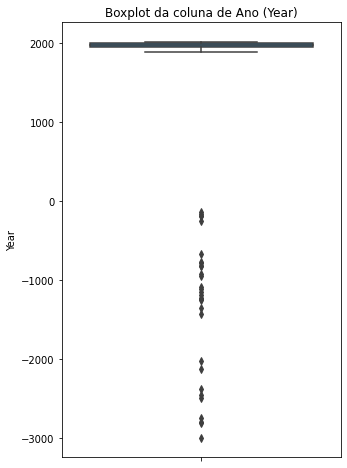

In [ ]:
# Agora para checar os valores de "Year", eu usei boxplot para visualizar outliers.

plt.figure(figsize=(5,8))                     # Determinando o tamanho da figura.
sns.boxplot(y=df['Year'])                     # Fazendo o boxplot.
plt.title("Boxplot da coluna de Ano (Year)")  # Determina o título do gráfico.
plt.show()                                    # Espera rodar todas as linhas para apresentar o gráfico.

In [ ]:
# Eu sabia que os valores negativas estavam errados, pois o dataset se referia somente as olímpiadas modernas.
# Então, eu criei um dataframe somente com os anos abaixo de 1896, pois as olímpiadas modernas começam em 1986.

ano_negativo = df[df["Year"] < 1896]
ano_negativo

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
20,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,-134,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
22,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,-182,Summer,Atlanta,Football,Football Women's Football,Bronze
236,977,Erik William Adlerz,M,19.0,NaN,NaN,Sweden,SWE,1912 Summer,-1421,Summer,Stockholm,Diving,Diving Men's Platform,Gold
237,977,Erik William Adlerz,M,19.0,NaN,NaN,Sweden,SWE,1912 Summer,-1246,Summer,Stockholm,Diving,Diving Men's Plain High,Gold
238,977,Erik William Adlerz,M,27.0,NaN,NaN,Sweden,SWE,1920 Summer,-2992,Summer,Antwerpen,Diving,Diving Men's Platform,Silver
239,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,-670,Summer,Beijing,Swimming,Swimming Women's 400 metres Freestyle,Gold
240,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,-248,Summer,Beijing,Swimming,Swimming Women's 800 metres Freestyle,Gold
241,980,"Rebecca ""Becky"" Adlington",F,23.0,179.0,70.0,Great Britain,GBR,2012 Summer,-825,Summer,London,Swimming,Swimming Women's 400 metres Freestyle,Bronze
526,2349,Ebbe Gustav Bertil Albertsson (-Andersson),M,26.0,177.0,67.0,Sweden,SWE,1948 Summer,-2378,Summer,London,Athletics,"Athletics Men's 10,000 metres",Bronze


In [ ]:
# Depois, sigo uma lógica parecida com a utilizada para os # de "City", mas dessa vez eu não preciso da
# informação de outras linhas para saber qual é o valor correto. Assim, não preciso criar dataframes, basta
# eu pegar a string da célula da coluna "Games" e usar .strip() para retirar o nome da temporada,
# usando como o valor a ser retirado a própria string da célula da coluna "Season" da mesma linha, restando 
# somente o ano em formato de string. Depois, eu converto a coluna inteira em int64 com .astype().

for lab, row in ano_negativo.iterrows() :

  df.loc[lab, "Year"] = df.loc[lab, "Games"].strip(df.loc[lab, "Season"]) 
  
df['Year'] = df["Year"].astype('int')


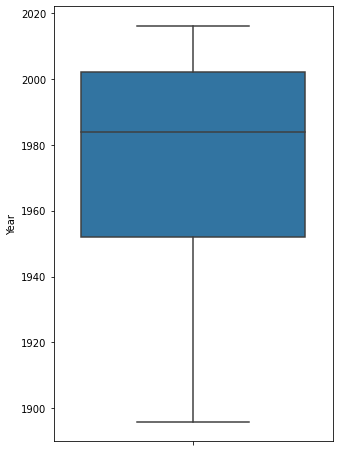

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['Year'])
plt.show()
#Nenhum outlier.

####**Height**

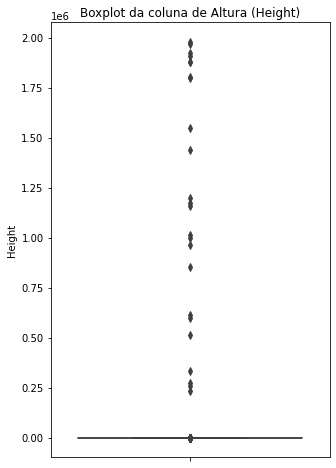

In [ ]:
# Agora para checar os valores de "Year", eu usei boxplot para visualizar outliers.

plt.figure(figsize=(5,8))
sns.boxplot(y = df['Height'].dropna())
plt.title("Boxplot da coluna de Altura (Height)")
plt.show()

In [ ]:
# Os outliers percebidos estão na casa dos milhões, mas, por segurança, decidi filtrar com base
# no homem mais alto do mundo de todos os tempos. Ele tinha 2,74m de altura.

alturas_altas = df[df["Height"] > 274]
alturas_altas


,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
82,367,Masashi Abe,M,28.0,1796909.0,64.0,Japan,JPN,1994 Winter,1994,Winter,Lillehammer,Nordic Combined,Nordic Combined Men's Team,Gold
83,371,Shinnosuke Abe,M,21.0,597740.0,91.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Nothing
84,379,Addis Abebe,M,21.0,513464.0,50.0,Ethiopia,ETH,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Men's 10,000 metres",Bronze
158,690,Chantal Achterberg,F,27.0,1436796.0,72.0,Netherlands,NED,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxed Eights,Bronze
159,690,Chantal Achterberg,F,31.0,1156881.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
161,698,Paul Douglas Ackerley,M,27.0,1976779.0,68.0,New Zealand,NZL,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Gold
499,2233,Noor Alam,M,26.0,1549598.0,73.0,Pakistan,PAK,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,Silver
500,2233,Noor Alam,M,30.0,233157.0,73.0,Pakistan,PAK,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Gold
501,2235,Karim Alami,M,27.0,1196132.0,85.0,Morocco,MAR,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Singles,Nothing
4160,13683,Nataliya Serhivna Borysenko,F,28.0,259708.0,NaN,Ukraine,UKR,2004 Summer,2004,Summer,Athina,Handball,Handball Women's Handball,Bronze


In [ ]:
# Optei por torná-los NaN's ao invés de dropá-los, pois perderíamos outras informações
# e ao invés de substituir pela moda, média ou mediana, pois enviesaria uma análise
# numérica de "height" com dados irreais.

for lab, row in alturas_altas.iterrows() :
  df.loc[lab, "Height"] = np.nan

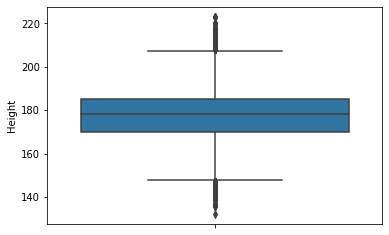

In [ ]:
# Checando de novo.
sns.boxplot( y = df["Height"])
plt.show()

# Parece tudo certo.

###Duplicatas:


In [ ]:
# Vendo se tem linhas duplicatas, usando .duplicated(). Se nenhum parâmetro é dado, vai se verificar se todos os valores
# de uma linha coincidem com outra.

duplicados = df.duplicated()
df[duplicados]
# Depois de uma breve pesquisa descobri que o Evento "Sailing Mixed" de 1900 tinha 2 corridas,
# sendo possível ganhar mais de uma medalha nesse mesmo evento, uma por corrida.
# Já o "Robert Tait Mackenzie" não tem erro, pois era permitido várias entradas em um mesmo evento de "Art Competition".

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3608,12115,Gaston Frdric Blanchy,M,31.0,NaN,NaN,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
6130,19874,Jean-Baptiste tienne August Charcot,M,23.0,NaN,NaN,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
9239,29661,Jacques Doucet,M,NaN,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
10521,33564,William Edgar Exshaw,M,34.0,NaN,NaN,Olle,GBR,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
13044,40973,Victor Auguste Godinet,M,47.0,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
22419,67525,Jacques le Lavasseur,M,NaN,NaN,NaN,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
23432,70374,Robert Linzeler,M,28.0,NaN,NaN,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
25876,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",Nothing
25877,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",Nothing
26411,79304,Mathias Joseph Ferdinand Jules Henri Mialaret,M,44.0,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver


In [ ]:
# Verificando duplicatas para atletas que participaram no mesmo evento no mesmo jogo do ano, pois não se espera 
# que um atleta participe duas vezes da mesma modalidade no mesmo ano, desconsiderando Sailing Mixed e Art competitions.

df_S = df[(df["Sport"] != "Sailing") & (df["Sport"] !="Art Competitions") ]

column_names = ['Athlete_ID','Games','Event']

testando = df_S.duplicated(subset = column_names, keep = False)   # subset estabelece quais colunas de células vai procurar duplicados.

df_S[testando].sort_values("Games")

# No caso do rowing, teve duas finais, estão está correto, presumo.
# Logo, não hpa duplicatas.

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5929,19094,Jean Baptiste Albert Joseph Cau,M,25.0,NaN,NaN,Cercle de l'Aviron Roubaix-4,FRA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Fours,Gold
5930,19094,Jean Baptiste Albert Joseph Cau,M,25.0,NaN,NaN,Cercle de l'Aviron Roubaix-4,FRA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Fours,Nothing


## Visualização e análise dos dados
 

### Comparar alturar e peso dos atletas nas modalidades

In [ ]:
# Aqui eu quero criar um Dataframe cujos índices são as modalidades e o sexo e uma única coluna com a média de IMC por esporte.

medalhista = df[df["Medal"] != "Nothing"]            # Criando um df somente com os medalhistas.
df_sex_imc = medalhista[["Event","Sex", "Weight"]]   # Depois, criando um df novo somente com as colunas de esporte, sexo e IMC dos medalhistas do df original.
df_s_imc_novo = df_sex_imc.groupby(["Event", "Sex"]).mean() # Criando um df que vai agrupar todos os valores de IMC por modalidade e sexo
                                                            # para realizar alguma operação, no caso, a média dos valores de IMC. Assim,
                                                            # esse df terá o esporte como o 1º nível de índice e o sexo como o 2º e 
                                                            # uma coluna com a média de IMC.
df_s_imc_novo

,,Weight
Event,Sex,
Aeronautics Mixed Aeronautics,M,NaN
Alpine Skiing Men's Combined,M,83.769231
Alpine Skiing Men's Downhill,M,83.268293
Alpine Skiing Men's Giant Slalom,M,78.829268
Alpine Skiing Men's Slalom,M,79.595238
...,...,...
"Wrestling Women's Flyweight, Freestyle",F,48.214286
"Wrestling Women's Heavyweight, Freestyle",F,73.214286
"Wrestling Women's Light-Heavyweight, Freestyle",F,70.000000


In [ ]:
# Aqui eu segui a mesma lógica que realizei para o peso, trocando somente a variável "Weight" por "Height".

medalhista = df[df["Medal"] != "Nothing"]
df_h_imc = medalhista[["Event","Sex", "Height"]]  
df_h_imc_novo = df_h_imc.groupby(["Event", "Sex"]).mean()
df_h_imc_novo

,,Height
Event,Sex,
Aeronautics Mixed Aeronautics,M,NaN
Alpine Skiing Men's Combined,M,178.923077
Alpine Skiing Men's Downhill,M,180.952381
Alpine Skiing Men's Giant Slalom,M,178.439024
Alpine Skiing Men's Slalom,M,178.363636
...,...,...
"Wrestling Women's Flyweight, Freestyle",F,155.133333
"Wrestling Women's Heavyweight, Freestyle",F,172.066667
"Wrestling Women's Light-Heavyweight, Freestyle",F,168.500000


In [ ]:
# Agora desejo fazer um histograma com o peso e outro com a altura dos atletas e, para tal, 1º eu uso o comando ".unstack()", 
# que é usado para pivotar um nível dos rótulos de índice (necessariamente hierárquicos)
# e retorna um DataFrame com um novo nível de rótulos de coluna cujo nível mais interno consiste nos rótulos
# de índice dinâmico pivotados. No caso, eu pivoto o índice "Sex", subdivindo-o agora em "colunas", não sei se de fato são
# colunas ou se somente modificou visualmente o dataframe, mas sei que é necessário para o próximo passo.

# Exemplo com o df de peso
pivotado = df_s_imc_novo.unstack(level=-1)
pivotado

Weight           
Sex                                                     F          M
Event                                                               
Aeronautics Mixed Aeronautics                         NaN        NaN
Alpine Skiing Men's Combined                          NaN  83.769231
Alpine Skiing Men's Downhill                          NaN  83.268293
Alpine Skiing Men's Giant Slalom                      NaN  78.829268
Alpine Skiing Men's Slalom                            NaN  79.595238
...                                                   ...        ...
Wrestling Women's Flyweight, Freestyle          48.214286        NaN
Wrestling Women's Heavyweight, Freestyle        73.214286        NaN
Wrestling Women's Light-Heavyweight, Freestyle  70.000000        NaN
Wrestling Women's Lightweight, Freestyle        56.285714        NaN
Wrestling Women's Middleweight, Freestyle       62.800000        NaN

[756 rows x 2 columns]

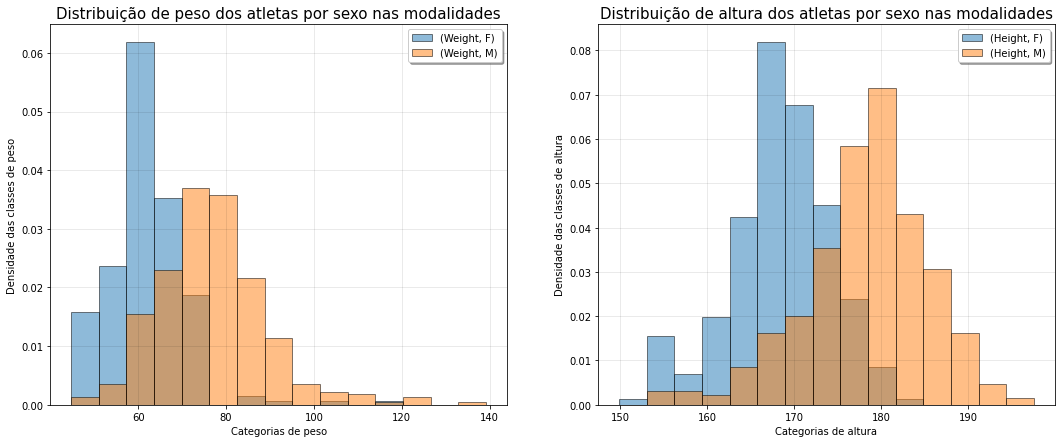

In [ ]:
# Agora continuando com os histograma dos atletas:

# Eu crio uma figura cujos eixos vão receber os dois histogramas, formando um grade de subplots (gráficos), 
# sendo o 1º nº o de linhas e o 2º de colunas dessa grade, e o figsize define o tamanho da figura total.
fig, axes = plt.subplots(1,2 , figsize = (18, 7))


# Eu uso o comando .plot do pandas para plotar um gráfico, sendo o "pivotado" o df que fornecerá o dataset, "ax" é posição no qual o gráfico 
# será plotado em "axes", como um dos lados da grade de subplots é unidimensional (esse só tem 1 linha), eu só preciso passar um único número
# para identificar a posição dos subplots, 0 é o 1º. Já "kind" é o tipo de gráfico, "alpha" é o nível de transparência, "density" é a transparência
# dos elementos plotados, "bins" é o nº de categorias uniformes do histograma e "edgecolor"  é o a cor do contorno do elemento plotado. Sendo o 1º histograma o do peso.

pivotado.plot(ax = axes[0], kind='hist', alpha = 0.5, bins = 15, edgecolor = "k", density = True) 

# Customizando o gráfico: 
axes[0].grid(color = "k" , alpha = 0.1)  # .grid() é um comando para alterar a grade do gráfico e "color" um parâmetro que define a cor.
axes[0].set_ylabel("Densidade das classes de peso")   # set_ylabel() customiza o nome do eixo y.
axes[0].set_xlabel("Categorias de peso")                              # set_xlabel() customiza o nome do eixo x.
axes[0].set_title("Distribuição de peso dos atletas por sexo nas modalidades", fontsize = 15)  #set_title() customiza o título e fontsize() o tamanha da fonte.
axes[0].legend(shadow=True, fontsize='medium')                        # legend() customiza a legenda, sendo shadow o efeito da sombra.
axes[0].set_facecolor('white')                                        # set_facecolor() customiza o background do gráfico.


# Agora faço o histograma da altura seguindo a mesma lógica que fiz para o peso.
df_h_imc_novo.unstack(level=-1).plot(ax = axes[1], kind='hist', alpha = 0.5, bins = 15, edgecolor = "k", density = True)

# Customizando:
axes[1].set_ylabel("Densidade das classes de altura")         
axes[1].set_xlabel("Categorias de altura")                
axes[1].set_title("Distribuição de altura dos atletas por sexo nas modalidades", fontsize = 15) 
axes[1].legend(shadow=True, fontsize='medium')
axes[1].set_facecolor('white')
axes[1].grid(color = "k" , alpha = 0.1)

#### Análise: 

Vemos como as mulheres são mais leves e mais baixas do que os homens, o que já era esperado. O gráfico foi normalizado, pois há uma proporção de quase 3 homens para cada mulher e também a quantidade absoluta por classe não é o foco.

É interessante notar também que os histogramas de peso das mulheres possuem uma distribuição baixa de peso entre as classes, havendo um pico bem elevado, enquanto o peso dos homens possui uma distribuição mais homogênea. Talvez isso seja devido a uma maior variação na taxa muscular do corpo do homens, já que eles conseguem ter uma taxa maior que as mulheres.

Em comparação ao histograma de peso, os histogramas de altura do homem e da mulher quase parecem o reflexo um do outro em torno da barra no meio. Só que os homens são um pouco mais bem distribuídos também, havendo uma amplitude maior, pelo menos visivelmente, entre a altura máxima e a mínima em comparação a das mulheres. 

### IMC nas modalidades

In [ ]:
# Aqui estou criando uma coluna que represente o IMC, Índice de Massa Corporal, e inserindo-a no dataframe original.
# O cálculo é feito pegando a massa em kg e divindo pelo quadrado da altura em metros. Para tal, peguei as colunas
# de "Weight" e "Height" para o cálculo.

df["IMC"] = df["Weight"] / (df["Height"]/100)**2
df.sort_values("IMC", ascending = False).head(5)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IMC
3624,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,Nothing,63.901580
28887,87041,Dmitry Yuryevich Nosov,M,24.0,176.0,175.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Half-Middleweight,Bronze,56.495351
20684,62843,Olha Vasylivna Korobka,F,22.0,181.0,167.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Super-Heavyweight,Silver,50.975245
6226,20144,Andrey Ivanovich Chemerkin,M,28.0,183.0,170.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Bronze,50.762937
6225,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,50.762937


In [ ]:
# Aqui segue a mesma lógica que eu fiz para o peso

medalhista = df[df["Medal"] != "Nothing"]
df_sex_imc = medalhista[["Event","Sex", "IMC"]]
df_s_imc_novo = df_sex_imc.groupby(["Event", "Sex"]).mean()
df_s_imc_novo.sort_values("IMC", ascending = True).head(5)  # Aqui o .sort_values é para ordernar os dados, no caso, eu escolhi
                                                             # a ordem crescente. E o .head() determinar quantas linhas eu quero

,,IMC
Event,Sex,
Rhythmic Gymnastics Women's Individual,F,16.361191
Rhythmic Gymnastics Women's Group,F,17.035969
"Athletics Women's 5,000 metres",F,17.661822
"Athletics Women's 10,000 metres",F,17.909463
Athletics Women's 20 kilometres Walk,F,18.086864


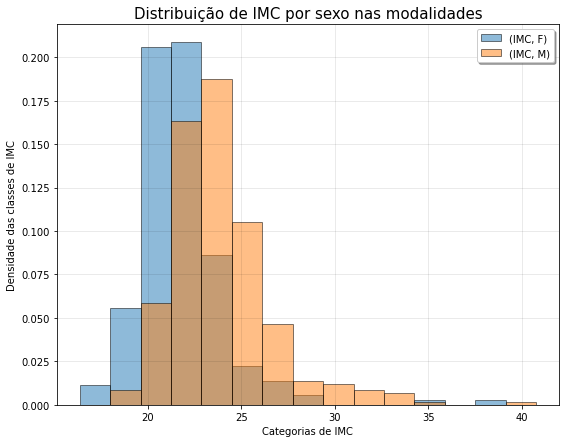

In [ ]:
# Aqui, eu segui a mesma lógica para plotar os histogramas de peso e altura

ax = df_s_imc_novo.unstack(level=-1).plot(kind='hist', figsize=(9, 7), alpha = 0.5, bins = 15, edgecolor = "k", density = True)
ax.grid(color = "k" , alpha = 0.1)
ax.set_facecolor("white")
ax.legend(shadow=True, fontsize='medium')
ax.set_ylabel("Densidade das classes de IMC")         
ax.set_xlabel("Categorias de IMC")                
ax.set_title("Distribuição de IMC por sexo nas modalidades", fontsize = 15)
plt.show()

Agora, eu quero fazer o histograma, subdividindo-o nas classes específicas do IMC, conforme a tabela abaixo:

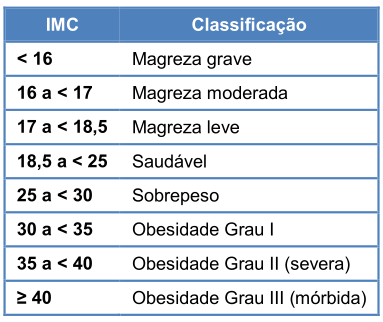

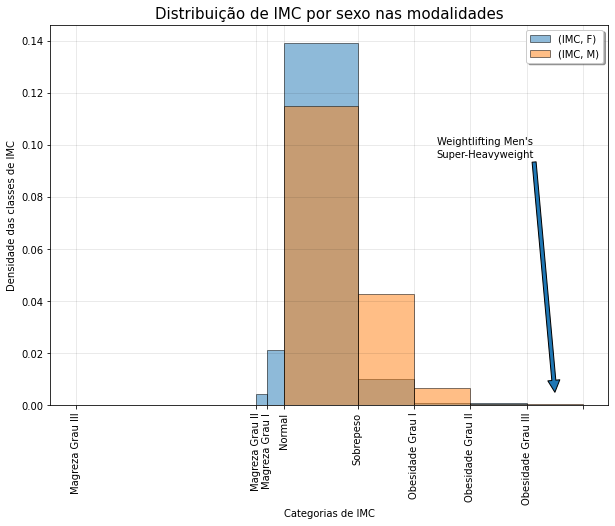

In [ ]:
# A lógica para montar esse histograma é a mesma das demais, com a diferença que eu defini as caixas dos histograma conforme
# as condições numéricas da tabela, tornando as caixas assimétricas. O "0" e o "45" são arbitrários, pois é só para impor um
# um valor onde inicia e onde finaliza as caixas extremas. Além disso, o nome das categorias se refere a barra a sua direita.

ax = df_s_imc_novo.unstack(level=-1).plot(kind='hist', figsize=(10, 7), alpha = 0.5, bins = [0, 16, 17, 18.5,25,30,35,40,45],
                                          edgecolor = "k", density = True)
ax.grid(color = "k" , alpha = 0.1)
ax.set_facecolor('white')
legend = ax.legend( shadow=True, fontsize='medium')
ax.annotate("Weightlifting Men's", xy = [32, 0.100])                                          # Anotando e localizando um texto na figura com xy
ax.annotate("Super-Heavyweight" , xytext = [32, 0.095], xy = [42.5, 0.005], arrowprops = {})  # Localizando o texto com xytext, arrowprops cria a seta 
                                                                                              # e o xy agora determina onde ela aponta.
ax.set_xticks([0, 16, 17, 18.5,25, 30, 35, 40, 45])                                           # Alterando as coordernandas onde as marcações aparecem no eixo x
ax.set_xticklabels(["Magreza Grau III", "Magreza Grau II", "Magreza Grau I", "Normal",        # Alterando o nome das marcações do eixo x e a sua rotação.
"Sobrepeso", "Obesidade Grau I", "Obesidade Grau II", "Obesidade Grau III"], rotation = 90)
ax.set_ylabel("Densidade das classes de IMC")         
ax.set_xlabel("Categorias de IMC")                
ax.set_title("Distribuição de IMC por sexo nas modalidades", fontsize = 15)
plt.show()  #.show() espera que todos os dados do eixo e da figura estejam finalizados para plotar.

####Análise:

Primeiramente, gostaria de lembrar que o gráfico é um histograma que mostra a proporção entre os valores das barras, mas isso não é indicado pela altura, mas sim pela área das barras. Dessa forma, Magreza Grau I tem uma proporção com o total das mulheres parecida com a proporção de Obesidade Grau I referente ao total dos homens.

É interessante notar que as mulheres tendem mais ao normal e a magreza, enquanto os homens ao normal e ao sobrepeso em diante. Essa diferença nas categorias acima do normal pode ser, talvez, porque as modalidades que selecionam o biotipo de sobrepeso em diante geralmente são aqueles que tem a modalidade "peso-pesado" ou que exigem muita força, podendo ter uma grande taxa massa muscular, o que é mais difícil para as mulheres. Entretanto, não sei dizer porque não nenhuma modalidade com homens magros, curioso.


Lembrando que os que estão na categoria de subpeso ou sobrepeso não são necessariamente mais ou menos saudáveis que os normais. Contudo, nota-se que não há modalidades que favorecem a Magreza Grau III, talvez porque alguém nessa condição já não consegue ter energia ou forças para ter um alto desempenho e nem para treinar com constância nenhuma modalidade.

Ademais, essa escala IMC foi criada para servir como instrumento de medida da população no geral, considerando que pessoas com determinado peso e altura, teriam determinada taxa adiposa e muscular, o que deve ser diferente com os atletas. 

### Top 10 países com mais medalhas de todos os tempos



#### Somandos os jogos olímpicos de verão e inverno

In [ ]:
# Essa célula é somente para ilustrar os processo que ocorre na célula seguinte.
# Recomendo pulá-la e depois voltar nela.

dici = {"Gold" : {"USA": 2 , "Brasil": 3, "Japão": 4}, "Silver": {"Japão": 1, "Brasil": 2}, "Bronze": {"USA": 1} }
sla = pd.DataFrame(dici)
sla

,Gold,Silver,Bronze
USA,2,NaN,1.0
Brasil,3,2.0,NaN
Japão,4,1.0,NaN


In [ ]:
# Como eu pretendo fazer vários quadros de medalhas, decidi criar uma função para não
# ficar repetindo. Além disso, como em alguns momentos vou subdividir os quadros de medalhas 
# por temporada e ano e em outros não, decidi fazer o ano e a temporada como keyword arguments.

# Quanto a lógica da função:
# Eu crio dicionários para cada medalha que contém os paísem que ganharam tal medalha.
# Depois, crio um Dataframe somando os 3 dicionários, pois dessa forma organiza os países em ordem alfabética
# e também insere "NaN"s quando não tem o input, como é possível visualizar na célula acima.

# Escolhi o nome "grupo", pois poderia receber o grupo de países ou atletas.
def medalhas (grupo, **kwargs):

# Ouro 
  Medalhas = df[df["Medal"] == "Gold"]           # Aqui eu crio um df baseado no original cuja coluna "Medal" só tem "Gold".

  if "season" in kwargs.keys():                                  # Aqui é para caso eu tenha especificado a temporada.
    Medalhas = Medalhas[Medalhas["Season"] == kwargs["season"]]  # Aqui filtra também o dataset "Medalhas" pela temporada especificada.
    
  if "year" in kwargs.keys():                                    # Aqui é para caso eu tenha especificado o ano.
    Medalhas = Medalhas[Medalhas["Year"] >= kwargs['year']]      # Aqui filtra também o dataset "Medalhas" a partir do ano especificado.

  Gold_value = Medalhas[grupo].value_counts()    # Depois, eu uso .value_counts() para me retornar uma série que mostra quais países ganharam ouro e a sua quantidade.
  Gold_dict = Gold_value.to_dict()               # Depois, converto essa série num dicionário cujas chaves são os países e os valores a quantidade da medalha.

#Repito o processo acima, mas com a Prata.                                                        
  Medalhas = df[df["Medal"] == "Silver"]

  if "season" in kwargs.keys():
    Medalhas = Medalhas[Medalhas["Season"] == kwargs["season"]]
    
  if "year" in kwargs.keys():
    Medalhas = Medalhas[Medalhas["Year"] >= kwargs['year']]

  Silver_value = Medalhas[grupo].value_counts()
  Silver_dict = Silver_value.to_dict()

# Repito o processo acima, mas com o Bronze. 
  Medalhas = df[df["Medal"] == "Bronze"]
  
  if "season" in kwargs.keys():
    Medalhas = Medalhas[Medalhas["Season"] == kwargs["season"]]
    
  if "year" in kwargs.keys():
    Medalhas = Medalhas[Medalhas["Year"] >= kwargs['year']]

  Bronze_value = Medalhas[grupo].value_counts()
  Bronze_dict = Bronze_value.to_dict()

# Em analogia com a célula acima, o que fiz abaixo é como seu tivesse criado um novo dicionário
# cujas chaves são Gold", "Silver" e "Bronze" e os valores são os 3 dicts que criei e depois só
# converti em um df.

  Medalhas = [Gold_dict, Silver_dict, Bronze_dict] # Criando uma lista com os dicionários
  Colunas_med = ["Gold", "Silver", "Bronze"]       # Nomes do índice pro dataframe
  Quadro_med = pd.DataFrame(Medalhas, Colunas_med) # Criando um df usando os dicionarios mais os nomes do índice.
  Quadro_med = Quadro_med.T                        # Transpondo a matriz
  Quadro_med = Quadro_med.sort_values(["Gold", "Silver", "Bronze"], ascending = False).head(10) # Selecionando o Top 10 em ordem decrescente

  return Quadro_med  # retornando o df só com o Top 10.

In [ ]:
# Vendo o top 10 no total.
Top_10 = medalhas ("NOC") 
Top_10

,Gold,Silver,Bronze
USA,2629.0,1636.0,1356.0
URS,1078.0,728.0,686.0
GER,740.0,670.0,743.0
GBR,677.0,737.0,649.0
ITA,575.0,531.0,529.0
FRA,499.0,610.0,665.0
SWE,479.0,521.0,535.0
CAN,460.0,435.0,446.0
HUN,430.0,331.0,369.0
GDR,397.0,325.0,280.0


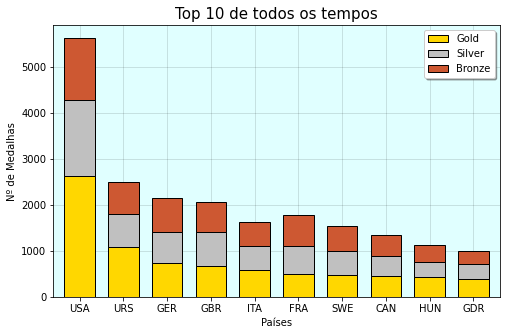

In [ ]:
# Realizando um gráfico de barras que mostra o nº de cada medalha ganha dos top 10
# países com mais medalhas de ouro.

ax = Top_10.plot(stacked=True, kind = "bar", figsize=(8, 5), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")

# O valor do argumento "color" é um código hexadecimal que peguei na internet.

ax.set_ylabel("Nº de Medalhas")                                              # Nome do eixo y
ax.set_xlabel("Países")                                                      # Nome do eixo x
ax.set_title("Top 10 de todos os tempos", fontsize = 15)                     # Título
ax.grid(color = "k" , alpha = 0.15)                                          # Cor da grade e o nível de transparência
ax.set_axisbelow(True)                                                       # Faz com que a grade fique por atrás do gráfico, não se sobrepondo a ele
ax.set_facecolor('lightcyan')                                                # Escolhendo a cor de fundo para ciano claro
ax.legend(shadow=True, fontsize = 'medium', facecolor = "white")              # Apresentando a legenda

plt.show()

##### **Análise**
Se analisarmos o nº de linhas de Quadro_med (149) e aproximarmos o nº de NOC como nº de países diferentes, teremos que os medalhistas olímpicos vieram somente de 149 países do mundo! Isso considerando não só o nº atual de países reconhecidos pela ONU (193), mas também os que já existiram como a Checoslováquia e a URSS.

Além disso, vemos que dentre as 10 nações que mais ganharam ouro, 9 são europeias e a outra é o Canadá. Dentre essas europeias, ainda se mantém no top 10 duas nações extintas, a URS (União Soviética) e a GDR (Alemã Oriental). Ambas extintas em 1991 e 1990 respectivamente.




#### Somente verão

In [ ]:
# Vendo o top 10 de todos os tempos no verão.

Top_10_S = medalhas ("NOC", season = "Summer")
Top_10_S

,Gold,Silver,Bronze
USA,2463.0,1329.0,1195.0
URS,829.0,632.0,593.0
GBR,635.0,727.0,618.0
GER,588.0,536.0,647.0
ITA,518.0,474.0,454.0
FRA,463.0,575.0,586.0
HUN,430.0,327.0,361.0
SWE,354.0,395.0,358.0
AUS,340.0,448.0,509.0
GDR,339.0,275.0,226.0


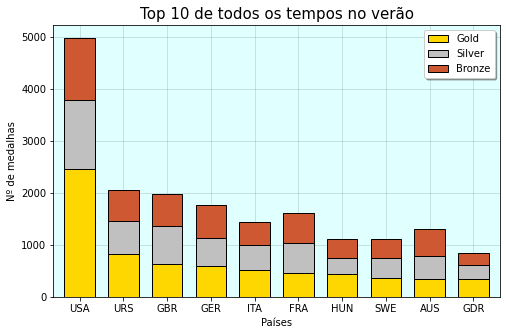

In [ ]:
# Aqui também, eu sigo a mesma lógica que usei para realização do gráfico da sessão anterior.

ax = Top_10_S.plot(stacked=True, kind = "bar", figsize=(8, 5), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")
ax.set_ylabel("Nº de medalhas")         
ax.set_xlabel("Países")                
ax.set_title("Top 10 de todos os tempos no verão", fontsize = 15) 
ax.grid(color = "k" , alpha = 0.15)
ax.set_facecolor('lightcyan')
ax.set_axisbelow(True)
legend = ax.legend(shadow=True, fontsize = 'medium', facecolor = "white")

#### Somente inverno

In [ ]:
# Vendo o top 10 de todos os tempos no inverno.

Top_10_W = medalhas ("NOC", season = "Winter")
Top_10_W

,Gold,Silver,Bronze
CAN,302.0,198.0,105.0
URS,249.0,96.0,93.0
USA,166.0,307.0,161.0
GER,152.0,134.0,96.0
NOR,151.0,165.0,126.0
SWE,125.0,126.0,177.0
RUS,93.0,89.0,77.0
AUT,79.0,98.0,103.0
SUI,76.0,70.0,129.0
FIN,66.0,145.0,215.0


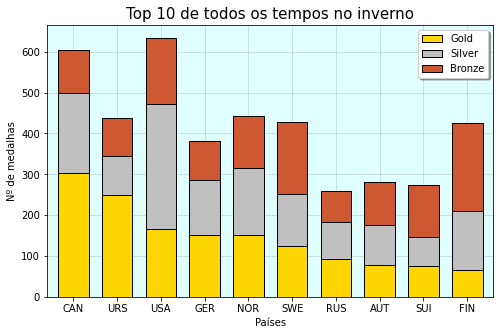

In [ ]:
# Aqui também, eu sigo a mesma lógica que usei para realização do gráfico da sessão anterior.

ax = Top_10_W.plot(stacked=True, kind = "bar", figsize=(8, 5), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")

ax.set_ylabel("Nº de medalhas")
ax.set_xlabel("Países")
ax.set_title("Top 10 de todos os tempos no inverno", fontsize = 15)
ax.grid(color = "k" , alpha = 0.15)
ax.set_facecolor('lightcyan')
ax.set_axisbelow(True)
legend = ax.legend(shadow=True, fontsize = 'medium', facecolor = "white")

#### Comparando inverno e verão

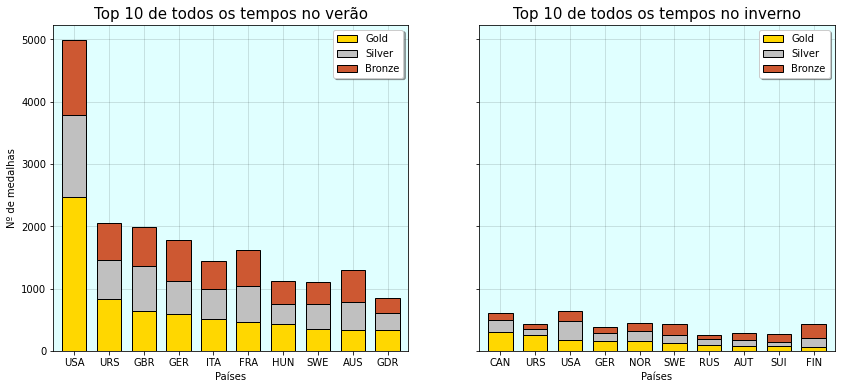

In [ ]:
# Para montar essa figura com 2 gráficos, eu segui a mesma lógica de quando fiz a figura com o peso e a altura.

fig, ambos = plt.subplots(1,2, sharey = True, figsize = (14, 6))

# Plotando 1º o gráfico de verão
Top_10_S.plot(ax = ambos[0], stacked=True, kind = "bar", color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")

ambos[0].grid(color = "k" , alpha = 0.15)
ambos[0].set_facecolor('lightcyan')
ambos[0].set_axisbelow(True)
ambos[0].legend(shadow=True, fontsize = 'medium', facecolor = "white")
ambos[0].set_ylabel("Nº de medalhas")         
ambos[0].set_xlabel("Países")                
ambos[0].set_title("Top 10 de todos os tempos no verão", fontsize = 15)

# Plotando agora o de inverno
Top_10_W.plot(ax = ambos[1], stacked=True, kind = "bar", color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")

ambos[1].grid(color = "k" , alpha = 0.15)
ambos[1].set_facecolor('lightcyan')
ambos[1].set_axisbelow(True)
ambos[1].legend(shadow=True, fontsize = 'medium', facecolor = "white")
ambos[1].set_ylabel("Nº de medalhas")         
ambos[1].set_xlabel("Países")                
ambos[1].set_title("Top 10 de todos os tempos no inverno", fontsize = 15)
plt.show()

##### Análise
Lembrando que a ordem dos países na somatória do verão e inverno era: USA, URS, GER, GBR, ITA, FRA, SWE, CAN, HUN, GDR. Nota-se, no gráfico de verão, que alterou a ordem de alguns países e saiu o Canadá para entrar a Austrália.
Agora no gráfico de inverno, percebe-se que o Canadá fica em 1º, depois a URS e só depois o USA e saem a Grã_Bretanha,a Itália, a França e a Hungria para entrarem países mais frios Noruega, Suíça, Finlândia e a Rússia. Tais mudanças de aparecerem países mais frios ou quentes a depender da temporada já eram esperadas.

Agora, com base na imagem abaixo, é curioso ver como somente um país que perpassa a zona intertropical, Austrália, aparece no quadro de medalhas de verão, enquanto todos perpassam a zona temperada. Além disso, com exceção da Hungria e da URSS, todos os países do gráfico de verão são do 1º mundo, mas URSS era uma potência global. Portanto, na realidade, o principal fator para ir bem na temporada olímpica de verão é ser um país de 1º mundo, acredito que seja porque são países que conseguem dar mais suporte a carreira desportiva de atletas. Já essa relevância de ser do 1º mundo é mais difícil de afirmar para a temporada de inverno, pois há uma grande interssecção entre os países frios e os de primeiro mundo.

Ademais, percebe-se que a vasta maioria das medalhas são dos esportes olímpicos de verão, mas um grande fator para isso é o surgimento posterior dos jogos de inverno, acarretando um menor soma total de medalhas. Há também uma baixa quantidade de esportes de inverno, mas não sei se é porque existem poucos ou porque somente poucos cumprem o requisito de serem um esporte olímpico (como no mínimo X países praticantes, o que é mais difícil de alcançar devido aos esportes de inverno serem mais restritivos climaticamente) ou ambos.



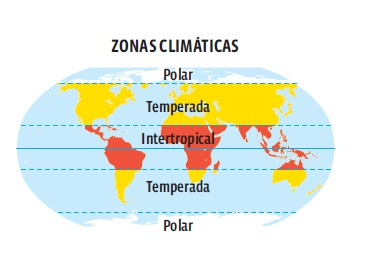

### Top 10 países das últimas 4 olímpiadas

#### Somando inverno e verão

In [ ]:
# Eu decidi fazer essa diferença, pois nas últimas 4 olimpíadas outros países se tornaram de 1º mundo e os emergentes tiveram mais
# relevância nos esportes, além de todos os países presentes existirem até hoje. Partindo de 2002 para incluir 4 edições de inverno.

Top_10 = medalhas ("NOC", year = 2002)
Top_10

,Gold,Silver,Bronze
USA,565.0,456.0,359.0
GER,252.0,213.0,234.0
RUS,252.0,203.0,300.0
CHN,242.0,165.0,163.0
CAN,224.0,119.0,145.0
GBR,166.0,139.0,119.0
AUS,125.0,190.0,193.0
KOR,117.0,73.0,81.0
FRA,109.0,136.0,123.0
NED,96.0,137.0,81.0


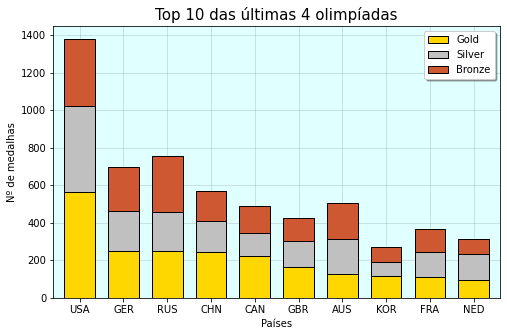

In [ ]:
# Aqui também, eu sigo a mesma lógica que usei para realização do gráfico da sessão anterior.

ax = Top_10.plot(stacked=True, kind = "bar", figsize=(8, 5), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")
ax.set_ylabel("Nº de medalhas")         
ax.set_xlabel("Países")                
ax.set_title("Top 10 das últimas 4 olimpíadas", fontsize = 15) 
ax.grid(color = "k" , alpha = 0.15)
ax.set_axisbelow(True)
ax.set_facecolor('lightcyan')
legend = ax.legend(shadow=True, fontsize = 'medium', facecolor = "white")

##### Análise
Quando se compara esse gráfico com o de Top 10 de todos os tempos, percebe-se que a diferença do USA para os outros países caiu consideravelmente. As medalhas de ouro estão mais bem distribuídas entre os 4 primeiros colocados.
Além disso, a URSS, a GDR, a Itália, a Hungria e Suécia saíram e entraram a China, a Rússia, a Coréia do Sul, a Austrália e a Holanda. A proporção de países de 1º mundo se manteve, mas há maior presença de países asiáticos agora e 2 dos BRICS apareceram.



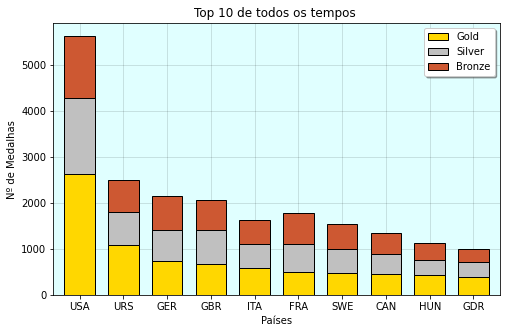

#### Inverno

In [ ]:
# Vendo o top 10 de todos os tempos no inverno das últimas 4 olimpíadas. 

Top_10_W = medalhas ("NOC", season = "Winter", year = 2002)
Top_10_W

,Gold,Silver,Bronze
CAN,205.0,72.0,37.0
GER,78.0,83.0,42.0
RUS,61.0,44.0,67.0
NOR,59.0,39.0,40.0
SWE,54.0,58.0,47.0
USA,42.0,162.0,93.0
AUT,34.0,32.0,37.0
KOR,32.0,20.0,6.0
NED,23.0,15.0,23.0
SUI,20.0,18.0,49.0


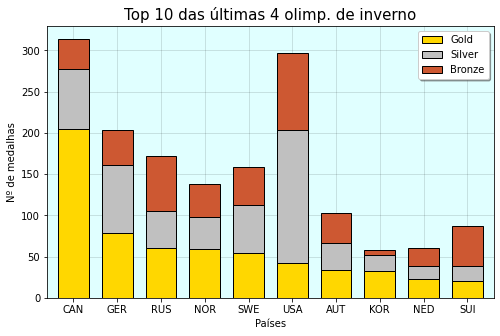

In [ ]:
# Aqui também, eu sigo a mesma lógica que usei para realização do gráfico da sessão anterior.

ax = Top_10_W.plot(stacked=True, kind = "bar", figsize=(8, 5), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")
ax.set_ylabel("Nº de medalhas")         
ax.set_xlabel("Países")                
ax.set_title("Top 10 das últimas 4 olimp. de inverno", fontsize = 15) 
ax.grid(color = "k" , alpha = 0.15)
ax.set_facecolor('lightcyan')
ax.set_axisbelow(True)
legend = ax.legend(shadow=True, fontsize = 'medium', facecolor = "white")

#### Verão

In [ ]:
# Vendo o top 10 de todos os tempos no inverno das 4 últimas edições de verão.

Top_10_S = medalhas ("NOC", season = "Summer", year = 2004)
Top_10_S

,Gold,Silver,Bronze
USA,523.0,294.0,266.0
CHN,226.0,148.0,137.0
RUS,191.0,159.0,233.0
GER,174.0,130.0,192.0
GBR,159.0,134.0,113.0
AUS,120.0,187.0,191.0
FRA,95.0,119.0,92.0
KOR,85.0,53.0,75.0
BRA,82.0,93.0,50.0
NED,73.0,122.0,58.0


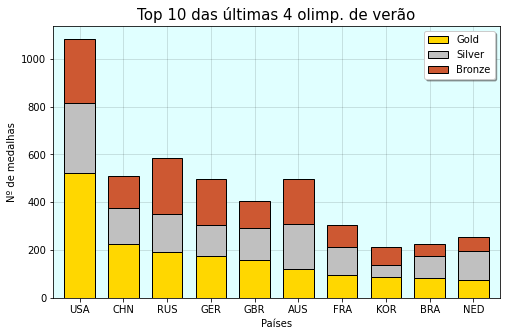

In [ ]:
# Aqui também, eu sigo a mesma lógica que usei para realização do gráfico da sessão anterior.

ax = Top_10_S.plot(stacked=True, kind = "bar", figsize=(8, 5), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")
ax.set_ylabel("Nº de medalhas")         
ax.set_xlabel("Países")                
ax.set_title("Top 10 das últimas 4 olimp. de verão", fontsize = 15) 
ax.grid(color = "k" , alpha = 0.15)
ax.set_facecolor('lightcyan')
ax.set_axisbelow(True)
ax.legend(shadow=True, fontsize='medium', facecolor = "white")
plt.show()

#### Comparando inverno e verão

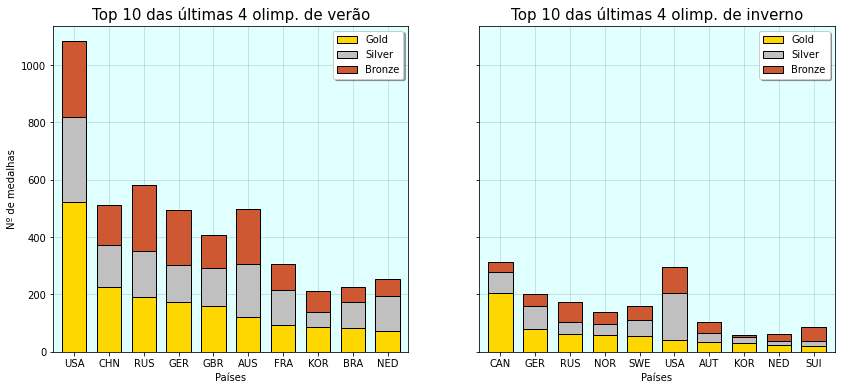

In [ ]:
# Aqui também, eu sigo a mesma lógica que usei para realização do gráfico duplo
# da sessão "Comparando inverno e verão" anterior.

fig, ambos = plt.subplots(1,2, sharey = True, figsize = (14, 6))

Top_10_S.plot(ax = ambos[0], stacked=True, kind = "bar", color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")

ambos[0].grid(color = "k" , alpha = 0.15)
ambos[0].set_facecolor('lightcyan')
ambos[0].set_axisbelow(True)
ambos[0].legend(shadow=True, fontsize = 'medium', facecolor = "white")
ambos[0].set_ylabel("Nº de medalhas")         
ambos[0].set_xlabel("Países")                
ambos[0].set_title("Top 10 das últimas 4 olimp. de verão", fontsize = 15) 

Top_10_W.plot(ax = ambos[1], stacked=True, kind = "bar", color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 0, edgecolor = "k")

ambos[1].grid(color = "k" , alpha = 0.15)
ambos[1].set_facecolor('lightcyan')
ambos[1].set_axisbelow(True)
ambos[1].legend(shadow=True, fontsize = 'medium', facecolor = "white")
ambos[1].set_ylabel("Nº de medalhas")         
ambos[1].set_xlabel("Países")                
ambos[1].set_title("Top 10 das últimas 4 olimp. de inverno", fontsize = 15) 
plt.show()

##### Análise
Lembrando que o top 10 somando inverno e verão era: USA, GER, RUS, CHN, CAN, GBR, AUS, KOR, FRA, NED. Assim, olhando o gráfico de verão já percebemos que a 1ª diferença é que apareceu o Brasil!! Eu mesmo não esperava isso, ele entrou no lugar do Canadá. Agora, quanto ao inverno, percebe-se que o Canadá lidera com grande diferença dos outros colocados tanto que essa é a razão de ter aparecido no quadro geral; que o USA estaria em 2º lugar no total de medalhas e que a Coréia apareceu.

Agora comparando esses dois gráficos com os que se referem a todas as olímpiadas na imagem abaixo, vemos que há uma proporção maior de olimpíadas de medalhas de inverno quando comparadas às de verão, pois agora há um mesmo nº de olímpiadas de verão e inverno realizadas. Além disso, que somente o USA e a Alemanha mantiveram suas posições no verão e que somente o Canadá se manteve igual nas olimpíadas de inverno.

Percebe-se que o grupo de principais países medalhistas se tornou um pouco menos eurocêntrico em ambas as temporadas. A temporada de verão apareceu mais um país tropical.

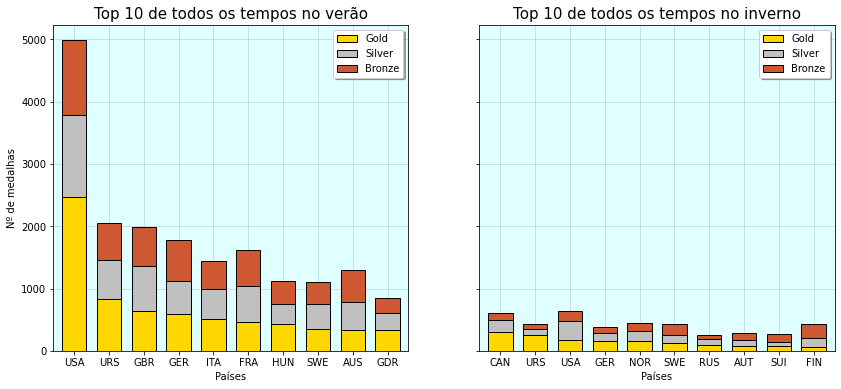

###Comparar a evolução de esportes que foram aderindo a modalidade feminina. Por exemplo, se era só um esporte, passou a ser 2, 3 etc e comparar com homems

Porque a discrepância na quantidade de medalhas entre homens e mulheres? Vamos checar.

In [ ]:
# Como meu objetivo é fazer um gráfico considerando o ano e a quantidade de modalidades por sexo.
# Assim, desejo retirar as linhas que possuem ao mesmo tempo sexo, ano e evento iguais.

df_sexo = df.drop_duplicates(["Sex", "Year", "Event"]) # 1º cria um df sem as linhas com os valores
                                                       # de sexo, ano e modalidade iguais.                                                
df_sexo = df_sexo.sort_values("Year")      # Depois, deixo os anos em ordem crescente, pois serviram de referência posteriormente.
df_sexo.head(5)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IMC
19053,58394,Frederick Keeping,M,28.0,NaN,NaN,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 12-Hours Race,Silver,NaN
1078,4189,Nikolaos Andriakopoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,Gold,NaN
14394,44875,Alfrd (Arnold-) Hajs (Guttmann-),M,18.0,NaN,NaN,Hungary,HUN,1896 Summer,1896,Summer,Athina,Swimming,Swimming Men's 100 metres Freestyle,Gold,NaN
11589,36739,Ioannis Frangoudis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",Silver,NaN
30926,93575,Joanni Maurice Perronet,M,18.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Silver,NaN


In [ ]:
# Agora, crio uma função que vai me retornar 2 dicionários para eu criar um df com o índice sendo os anos dos jogos olímpicos as colunas sendo
# o nº de modalidades masculinos e o nº de modalidades femininas, o df será criado seguindo a mesma lógica de uso de dicionários que usei
# para criar os df's dos quadros de medalhas.

def criando_df (season): #Criando a função que vai receber a temporada

  df_season = df_sexo[df_sexo["Season"] == season]  # Criando um df que vai receber o data de df_sexo somente
                                                         # para a temporada determinada.
  def criando_dict (sex, dicionario): #Criando uma função só para repetir duas vezes o processo, uma com Homem e outra com Mulher.
    df_sexo_season = df_season[df_season["Sex"] == sex]  # Criando um df que vai receber o data de df_season
                                                         # somente para o sexo determinado.
    df_sem_dup = df_sexo_season.drop_duplicates("Year")  # Retirando agora os anos duplicados só para o processamento ser mais rápido,                
                                                         # pois os duplicados não são um problema, como vou explicar a seguir.
    for lab, row in df_sem_dup.iterrows():      # Usando esse comando para pegar todos os anos que tiveram olimpíada em determinada temporada para determinado sexo.
      Ano = df_sexo_season.loc[lab, "Year"]              # "Ano" vai receber o valor de ano.

      novo_df = df_sexo_season[df_sexo_season["Year"] == Ano]  # Crio um df que vai filtrar o df_sexo_season selecionando o "Year" pelo "Ano" da linha.
      dicionario[Ano] = novo_df["Event"].count()  # Uso o dicionario "teste_f" ou "teste_m" para receber como chave o "Ano" e a quantidade de eventos diferentes,
                                                  # sendo o comando .count() que vai me retornar o nº de eventos diferentes.
  criando_dict("F", teste_f)                      # Agora uso a função criando_dict para preencher os respectivos dicionários que estarão relacionados
  criando_dict("M", teste_m)                      # ao sexo masculino ou

#### Verão

In [ ]:
# Agora, vou criar o df para o verão, mas toda vez que usar a função eu preciso reiniciar o conteúdo dos dicionários
# deve ter uma maneira de fazer isso incluindo os dicionários na função, mas não sei.

teste_m = {}
teste_f = {}

criando_df("Summer")

dif_sex_s = pd.DataFrame([teste_m, teste_f], ["Nº de eventos masculinos", "Nº de eventos femininos"])   # Aqui é eu criando um df usando os dicionarios, 
dif_sex_s = dif_sex_s.T                                                                                 # tal como fiz para os quadros de medalhas.       
dif_sex_s.head(5)

,Nº de eventos masculinos,Nº de eventos femininos
1896,43.0,NaN
1900,87.0,6.0
1904,92.0,3.0
1906,73.0,2.0
1908,105.0,6.0


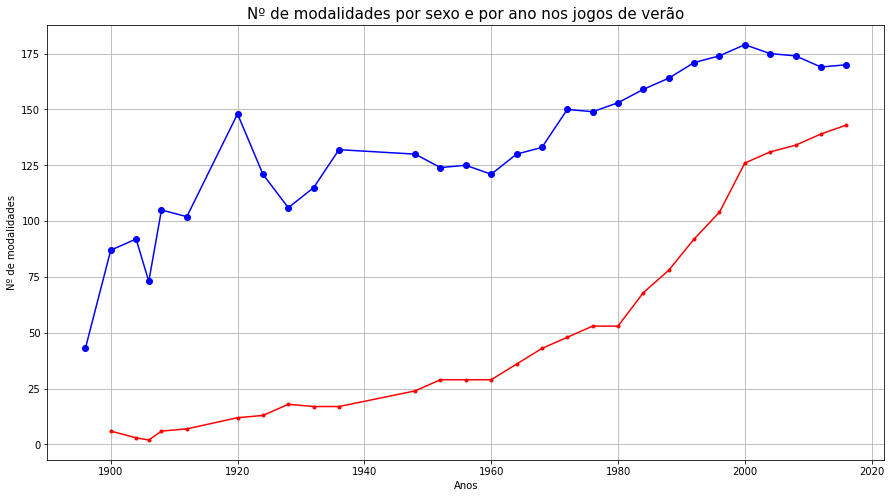

In [ ]:
# Agora montando um gráfico de linhas e customizando-o. Só que dessa vez eu não uso .plot() e outros comandos do matplotlib
# ligado a um objeto de dataframa (que é o que antecende o "." em .plot)(plt é a biblioteca), agora eu simplesmente chamo os comandos.

plt.figure(figsize = (15, 8)) # Customizo o tamanho da figura que recebeu o gráfico

# Por não ter associado um df antes, eu tenho que definir o eixo x e o y e depois usei argumentos opcionais, como o marker que define
# o símbolo que representa os pontos nos gráfico, color que é a cor da linha e também dos pontos e "linestyle" que é o estilo da linha.
# O eixo x usado é o índice do df.

plt.plot(dif_sex_s.index, dif_sex_s["Nº de eventos masculinos"], marker = "o", color = "b", linestyle = "-") # O eixo y são os valores da coluna "Nº de eventos masculinos"
plt.plot(dif_sex_s.index, dif_sex_s["Nº de eventos femininos"], marker = ".", color = "r", linestyle = "-")  # O eixo y são os valores da coluna "Nº de eventos femininos"
plt.ylabel("Nº de modalidades")                                                     # Igual ao set_ylabel
plt.xlabel("Anos")                                                                  # Igual ao set_xlabel
plt.title("Nº de modalidades por sexo e por ano nos jogos de verão", fontsize = 15) # Igual ao set_title

plt.grid() 

#### Inverno

In [ ]:
# Criando o df de inverno tal qual fiz para o verão.

teste_m = {}
teste_f = {}
criando_df("Winter")

dif_sex_w = pd.DataFrame([teste_m, teste_f], ["Nº de eventos masculinos", "Nº de eventos femininos"])
dif_sex_w = dif_sex_w.T
dif_sex_w.head(5)

,Nº de eventos masculinos,Nº de eventos femininos
1924,16,2
1928,12,2
1932,13,2
1936,15,3
1948,18,5


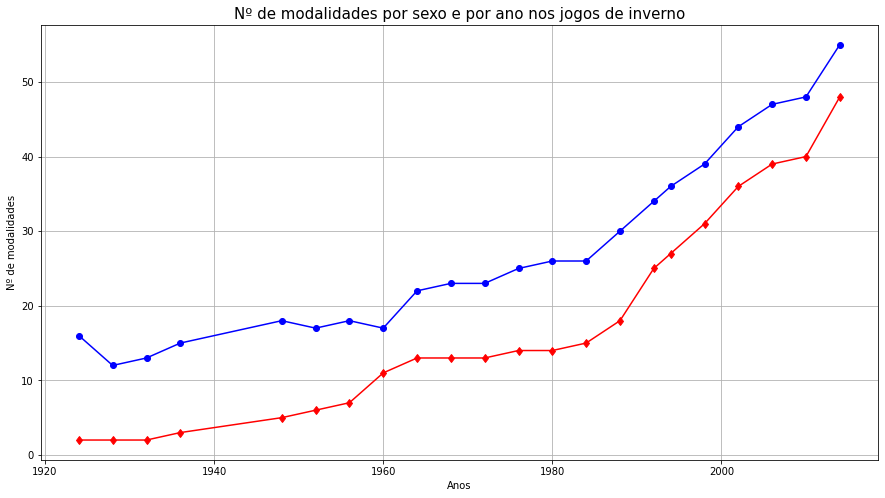

In [ ]:
#Agora montando um gráfico usando o mesmo processo que usei para o verão
plt.figure(figsize = (15, 8))
plt.plot(dif_sex_w.index, dif_sex_w["Nº de eventos masculinos"], marker = "o", color = "b", linestyle = "-")
plt.plot(dif_sex_w.index, dif_sex_w["Nº de eventos femininos"], marker = "d", color = "r", linestyle = "-")
plt.ylabel("Nº de modalidades")
plt.xlabel("Anos")
plt.title("Nº de modalidades por sexo e por ano nos jogos de inverno", fontsize = 15)

plt.grid()

#### Ambos

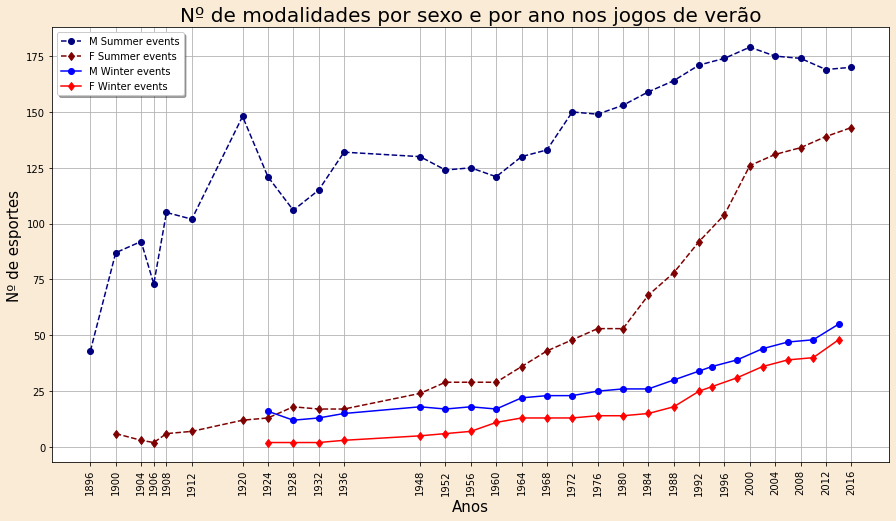

In [ ]:
# Agora em um mesmo gráfico eu comparo o nº de modalidades por sexo, ano e temporada.
# Definindo a figura e os eixos.

fig, ambos = plt.subplots(figsize = (15,8))

# Mesma lógica de quando eu estava plotando os gráficos de verão e inverno separadamente, só que dessa vez eu botei eles no mesmo Subplot
# "ambos", que eu criei acima.

ambos.plot(dif_sex_s.index, dif_sex_s["Nº de eventos masculinos"], marker = "o", color = "#00007f", linestyle = "--", label = "M Summer events")
ambos.plot(dif_sex_s.index, dif_sex_s["Nº de eventos femininos"], marker = "d", color = "#7f0000", linestyle = "--", label = "F Summer events" )


ambos.plot(dif_sex_w.index, dif_sex_w["Nº de eventos masculinos"], marker = "o", color = "b", linestyle = "-", label = "M Winter events")
ambos.plot(dif_sex_w.index, dif_sex_w["Nº de eventos femininos"], marker = "d", color = "r", linestyle = "-", label = "F Winter events")

ambos.legend( shadow=True, fontsize='medium')
plt.ylabel("Nº de esportes", fontsize = 15)
plt.xlabel("Anos", fontsize = 15)
plt.title("Nº de modalidades por sexo e por ano nos jogos de verão", fontsize = 20)
fig.patch.set_facecolor('antiquewhite')               # Alterando a cor de fundo da figura.
ambos.set_xticks(dif_sex_s.index)                     # Alterando as coordernandas onde as marcações aparecem no eixo x,
                                                      # usando os próprios valores do ano como coordernada.
ambos.set_xticklabels(dif_sex_s.index, rotation = 90) # Os nomes das marcações já seriam os mesmos sem esse comando, mas precisei usá-lo
                                                      # para rotacionar o nome dos anos e para isso eu precisava chamar os nomes.
plt.grid()

##### Análise
Há várias coisas interessante nesse gráfico, elencandos-as mas não em ordem de importância: 

**Primeiro**, é a diferença na proporção do nº de modalidades por sexo, principalmente nos jogos de verão. Suponho que essa diferença entre sexos entre verão e inverno se deve ao fato de que os países participantes dos jogos de inverno são mais progressistas quanto ao direito e participação das mulheres na sociedade, acarretando em esportes que possuem mais modalidades femininas quando comparado aos esportes de verão. 

Aliás, para complementar a análise, eu decidi plotar o mesmo gráfico, que se encontra na imagem abaixo, só que com o nº de eventos no lugar de modalidades, para isso eu só substitui o "Event" por "Sport" nas duas células iniciais. Comparando os dois, nota-se que o nº de esportes femininos de verão passou os masculinos nos anos 2000, enquanto o nº de modalidades continua abaixo, ressaltando a diferença entre a proporção de modalidades por esporte por sexo no verão. Assim, penso que a diferença no nº de modalidades nas últimas edições olimpícas de verão não seria em razão de um progressismo, mas sim em razão de, talvez, haver uma variação maior de peso dos homens, como é possível ver no gráfico de peso. Essa variação acarretaria mais modalidades em esportes que separam os atletas por peso, como os de artes marciais, isso também justificaria, em parte, o porquê de haver essa "incongruência" entre o nº de esportes e modalidades no verão, mas não no inverno (que suponho haver menos ou nenhum esportes que diferenciem peso).

**Segundo**, nota-se que os jogos de inverno se iniciaram somente em 1924 e seguiram no mesmo ano que os de verão até 1992, quando se decidiu se distar 2 anos dos de verão. Agora olhando o início dos jogos de verão, percebe-se que a 1ª realização foi composta exclusivamente de homens, acredito que a ideia era tentar ser mais fiel aos jogos antigos que eram compostos exclusivamente de homens também, ainda mais que essa edição foi realizada em Atenas.

**Terceiro**, percebe-se a pausa entre os jogos olimpícos durante as Guerras Mundiais e também um salto de um aumento de quase 50% de modalidades ao fim da 1ª GM, não sei dizer o porquê.

**Quarto**, percebe-se que há um ano de olimpíada que dista 2 anos dos anos olímpicos adjacentes, o de 1906. Eu fui procurar e descobri que a olimpíada se ano se refere ao 1º "Intercaleted Games" que eram para ser jogos tais quais os olimpícos e que aconteceriam de 4 em 4 anos, mas 2 anos separados dos jogos olimpícos propriamente, a única diferença é que o IG ocorreria sempre em Atenas.
Entretanto, devido a diversos problemas e também a 1ª GM, essa ideia foi abandonada.

**Quinto**, o gráfico permite visualizar o porque da diferença no nº total de medalhas entre verão e inverno que vimos anteriormente, quando vemos a diferença no nº de modalidades e no ano que os jogos começaram por temporada.

**Sexto**, o nº de modalidades tem apresentado uma tendência crescente, excentuando o masculino do verão das últimas edições. Isso, se deve, como vemos no gráfico de esportes abaixo, há um crescente nº de esportes também. Será que em algum momento um ou ambos vão se estabilizar? Ou, com a globalização, os mais diferentes esportes vão se difundir pelo globo, acarretando a adoção de mais esportes na olimpíadas (um dos critérios é X nº de países em Y de continentes praticarem tal esporte) e elevação de modalidades? Quais são as chances de surgir uma modalidade ou um esporte novo(a), seja completamente ou uma variante suficientemente diferente de um(a) tradicional?


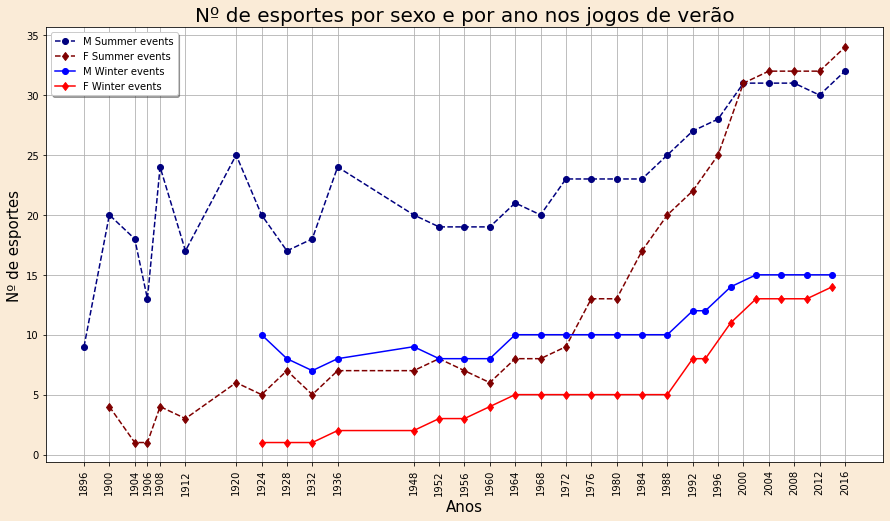

### Atletas que ganharam mais medalhas

#### No mundo

In [ ]:
# Aqui eu quero criar um dicionário que tem como chave o ID dos atletas e como valor o seus nomes
# para usar na célula seguinte.Também fiz isso, pois os ID são únicos, enquanto há nomes repetidos.

Atl_Nome = df[["Athlete_ID" , "Name"]]        # Criando um df só com os ID's e os nomes
Atl_Nome.drop_duplicates(inplace= True)       # Tirando as linhas duplicadas

Atl_Nome = Atl_Nome.set_index("Athlete_ID")   # Botando o ID como índice, pois ainda era o índice do original e porque
Atl_Nome_dict = Atl_Nome.to_dict()            # o índice novo que será a chave quando for convertido. Eu converti o df em dic nessa linha.

# Contudo, foi criado um dicionário cuja chave é "Name" e o valor é o dicionário cujas chaves são ID's e os valores os nomes
# Portanto, como o que me interessa é o dicionário de dentro, eu crio um dict só para receber o dentro que eu chamei usando a chave "Name".
Atl_Nome_dict2 = Atl_Nome_dict["Name"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Aqui eu sigo a mesma lógica que fiz para relacionar as medalhas aos países, só que agora as 
# relaciono aos ID's e troquei o nome "Medalhas" por "Atletas". Não usei a função "medalhas",
# pois ela me retorna um df só com as colunas de medalhas e aqui eu desejo inserir também uma coluna
# com os nomes, aí fiz manualmente.

Atletas = df[df["Medal"] == "Gold" ]
Gold_value = Atletas.Athlete_ID.value_counts()
Gold_dict = Gold_value.to_dict()

Atletas = df[df["Medal"] == "Silver" ]
Silver_value = Atletas.Athlete_ID.value_counts()
Silver_dict = Silver_value.to_dict()

Atletas = df[df["Medal"] == "Bronze" ]
Bronze_value = Atletas.Athlete_ID.value_counts()
Bronze_dict = Bronze_value.to_dict()

Atletas = [Atl_Nome_dict2, Gold_dict, Silver_dict, Bronze_dict]  # Só que acrescento o dict dos ID's e nomes para depois
Colunas_med = ["Name", "Gold", "Silver", "Bronze", ]             # tornar os nomes em índice no lugar do ID's.
Quadro_med = pd.DataFrame(Atletas, Colunas_med)
Quadro_med = Quadro_med.T
Quadro_med = Quadro_med.sort_values(["Gold", "Silver", "Bronze"], ascending = False)
Quadro_med.set_index("Name", inplace = True)                     # Aqui eu torno os nomes em índice.
Quadro_med.head(10)

,Gold,Silver,Bronze
Name,,,
"Michael Fred Phelps, II",23,3,2
"Raymond Clarence ""Ray"" Ewry",10,NaN,NaN
Larysa Semenivna Latynina (Diriy-),9,5,4
Paavo Johannes Nurmi,9,3,NaN
Mark Andrew Spitz,9,1,1
"Frederick Carlton ""Carl"" Lewis",9,1,NaN
Ole Einar Bjrndalen,8,4,1
Birgit Fischer-Schmidt,8,4,NaN
Sawao Kato,8,3,1


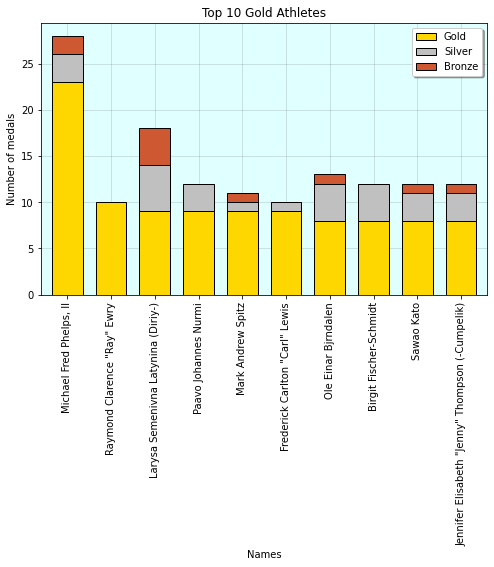

In [ ]:
# Aqui, sigo a mesma lógica que usei para plotar o gráfico de medalhas por países.

Quadro_Top_10 = Quadro_med.head(10)

ax = Quadro_Top_10.plot(stacked=True, kind = "bar", figsize=(8, 5), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 90, edgecolor = "k")
ax.set_ylabel("Number of medals")         
ax.set_xlabel("Names")                
ax.set_title("Top 10 Gold Athletes") 
ax.grid(color = "k" , alpha = 0.15)
ax.set_facecolor('lightcyan')
ax.set_axisbelow(True)
legend = ax.legend(shadow=True, fontsize = 'medium', facecolor = "white")

##### Análise
**Primeiro**, nota-se como o Michael Phelps era um monstro olímpico. Se eu não me engano, ele tinha proporções corporais que o davam (grande?) vantagem na natação. O que faz entrar na discussão de quanto desses atletas são talentosos e o quanto é uma vantagem do seu biotipo/genética.

**Segundo**, há 3 mulheres e 7 homens supermedalhistas. Isso provalmente ocorre porque há mais atletas masculinos, acarretando mais chances de algum ser um supermedalhista. Corrobora ainda mais o fato que a proporção de mulheres medalhistas é de 28%, sendo quase a mesma proporção de 30%  de superatletas mulheres. Como é possível ver na célula abaixo.

In [ ]:
limpeza = df[df["Medal"] != "Nothing"]
limpeza.drop_duplicates("Athlete_ID")
limpeza.Sex.value_counts()

# 11100/(28583 + 11100) = aproximadamente 0.28 

M    28538
F    11100
Name: Sex, dtype: int64

#### No Brasil

In [ ]:
# Aqui, eu quero ver os melhores medalistas brasileiros. Para tal, segui a mesma lógica da sessão anterior,
# com exceção de que, primeiro, eu filtrei o df original só com atletas brasileiros.

Atl_br = df[df["NOC"] == "BRA"]             # Criando um df só com os atletas brasileiros.
Atl_Nome = Atl_br[["Athlete_ID" , "Name"]]  # Depois, pegando a relação entre os ID's e os nomes só dos br's.
Atl_Nome.drop_duplicates(inplace= True)

Atl_Nome = Atl_Nome.set_index("Athlete_ID")
Atl_Nome_dict = Atl_Nome.to_dict()

Atl_Nome_dict2 = Atl_Nome_dict["Name"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Mesma lógica da sessão anterior.

Atletas = Atl_br[Atl_br["Medal"] == "Gold" ]
Gold_value = Atletas.Athlete_ID.value_counts()
Gold_dict = Gold_value.to_dict()

Atletas = Atl_br[Atl_br["Medal"] == "Silver" ]
Silver_value = Atletas.Athlete_ID.value_counts()
Silver_dict = Silver_value.to_dict()

Atletas = Atl_br[Atl_br["Medal"] == "Bronze" ]
Bronze_value = Atletas.Athlete_ID.value_counts()
Bronze_dict = Bronze_value.to_dict()

Atletas = [Atl_Nome_dict2, Gold_dict, Silver_dict, Bronze_dict]
Colunas_med = ["Name", "Gold", "Silver", "Bronze", ]
Quadro_med = pd.DataFrame(Atletas, Colunas_med)
Quadro_med = Quadro_med.T
Quadro_med = Quadro_med.sort_values(["Gold", "Silver", "Bronze"], ascending = False)
Quadro_med.set_index("Name", inplace = True)
Quadro_med.head(15)                           

,Gold,Silver,Bronze
Name,,,
Robert Scheidt,2,2,1
"Srgio ""Escadinha"" Dutra dos Santos",2,2,NaN
Torben Schmidt Grael,2,1,2
Marcelo Bastos Ferreira,2,NaN,1
Adhemar Ferreira da Silva,2,NaN,NaN
"Fabiana ""Fabi"" Alvim de Oliveira",2,NaN,NaN
Fabiana Marcelino Claudino,2,NaN,NaN
Giovane Farinazzo Gvio,2,NaN,NaN
"Jaqueline Maria ""Jaque"" Pereira de Carvalho Endres",2,NaN,NaN


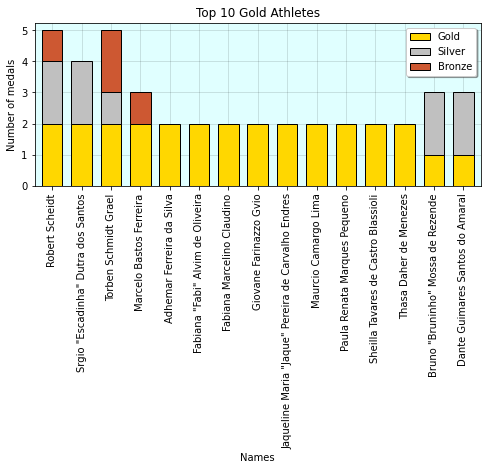

In [ ]:
# # Mesma lógica da sessão anterior. Contudo, eu decidi pelo top 15, pois do 5º ao 10º
# era tudo igual e eu queria mais variedade.

Quadro_Top_10 = Quadro_med.head(15) 

ax = Quadro_Top_10.plot(stacked=True, kind = "bar", figsize=(8, 3), color = ("#ffd700","#c0c0c0","#cd5832"), width = 0.7, rot = 90, edgecolor = "k")
ax.set_ylabel("Number of medals")         
ax.set_xlabel("Names")                
ax.set_title("Top 10 Gold Athletes") 
ax.grid(color = "k" , alpha = 0.15)
ax.set_facecolor('lightcyan')
ax.set_axisbelow(True)
legend = ax.legend(shadow=True, fontsize = 'medium', facecolor = "white")

##### Análise

Primeiro, nota-se que os 13º primeiros tem uma mesma quantidade de medalhas de ouro (2). Então a posição entre o 5º e o 13º é arbitrário, no caso seguiu a ordem alfabética.

Segundo, a análise da proporção entre homens e mulheres nos 10ºs colocados é capciosa, pois é uma amostra baixa para inferir algum julgamento de toda a população, ainda mais quando a posição do 5º ao 10º não tem critério específico. Por exemplo, poderia ter de 6 mulheres a 3 mulheres nesse Top 10, mas, coincidentemente, tem 3 de 10. Exatamente a mesma proporção do Top 10 global e quase o mesmo valor da proporção de de mulheres medalhistas brasileiras que é de 29%, conforme a célula abaixo.

In [ ]:
limpeza = df[df["Medal"] != "Nothing"]
limpeza = limpeza[limpeza["NOC"] == "BRA"]
limpeza.drop_duplicates("Athlete_ID")
limpeza.Sex.value_counts()

# 141/(340+141) = aproximadamente 0,29 

M    340
F    131
Name: Sex, dtype: int64

# Conclusão Final

Gostei que fui surpreendido com várias informações que eu não esperava sobre as olimpíadas, tais como
o "Intercalated Games", descobrir que existia uma competição de artes, que há mais esportes femininos, que não existe nenhuma modalidades em que média seja de homens magros etc. 

Quanto a uma conclusão geral, percebe-se a diferença histórica entre os genêros e os países, mas isso está diminuindo conforme as edições avançam. Apareceu alguns padrões entre atleta medalhistas, mas não sei dizer quanto desses padrões, como altura, são exclusivamente dos medalhistas em razão de não haver uma amostra grande de não medalhistas.

Finalizando, gostei muito de limpar, analisar e visualizar esse dataset, pois aprendi muita coisa pesquisando, principalmente pesquisando por fora e pude reforçar o que aprendi no Turing Academy. É recompensador ver seu conhecimento tomar forma com os gráficos e tabelas.
